## Import Libraries

In [662]:
# import required libraries

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns


## Set Options for Figures

In [964]:
# invoke custom Matplotlib stylesheet 
plt.style.use('resources/yh-style.mpl')

# set color palettes for plots
color_palette = {'#ba324f', '#e75a7c', '#ffb3c8', '#f3722c', '#f8961e', '#f9c74f', '#f0ffb3', '#90be6d', '#25a18b', '#0d6a87', '#83D7FC', '#aaa1c8', '#6b3c80', '#00ffee', '#6d8886'}

color_palette_10 = {'#ba324f', '#ffb3c8','#e75a7c', '#f8961e', '#f9c74f', '#90be6d', '#0d6a87', '#aaa1c8', '#6b3c80', '#00ffee'}

## Load Files
The data is divided into two files, one for championship results, one for information on each participating horse. 

In [1310]:
# load CSV of championship results into a dataframe 
championship_df = pd.read_csv('resources/yh-championship-data.csv')

# display first 10 records
championship_df.head(10)

,Year,Division,Horse,OverallPlacing,HighestLevel,CDI,USDFNumber,OverallScore
0,2002,FEI5,Rosabella,1,Third Level,No,37232,7.84
1,2002,FEI5,Favereux,2,Grand Prix,No,38714,7.68
2,2002,FEI5,Devon,3,Third Level,No,38984,7.42
3,2002,FEI5,Welfenstein,4,Grand Prix,Yes,40474,7.14
4,2002,FEI5,R-tistik,5,Grand Prix,Yes,37123,7.10
5,2002,FEI5,Pampero,6,FEI 5 Year Old,No,41386,6.82
6,2002,FEI6,Oleander,1,Grand Prix,Yes,35062,8.24
7,2002,FEI6,Freestyle,2,Prix St. Georges,No,39380,7.40
8,2002,FEI6,Wincenzo,3,Prix St. Georges,No,1026740,7.00
9,2002,FEI6,Olympus,4,Grand Prix,Yes,42683,6.86


In [1311]:
# load CSV of horse data into a dataframe 
horse_df = pd.read_csv('resources/yh-horse-data.csv')

# display first 10 records
horse_df.head(10)


,Horse,HighestLevel,CDI,USDFNumber,Sire,Damsire,Country,Breeder,Studbook,InternationalTeam,TeamMade
0,Rosabella,Third Level,No,37232,Rohdiamant,Watzmann,Germany,Kerstin Ohlemeyer,Hanoverian,No,NaN
1,Favereux,Grand Prix,No,38714,Fidermark,Fidelio,Germany,Johannes Hilgers,Rhinelander,No,NaN
2,Devon,Third Level,No,38984,Don Gregory,NaN,NaN,NaN,Oldenburg,No,NaN
3,Welfenstein,Grand Prix,Yes,40474,Wolkenstein II,Lauries Crusador xx,Germany,Heinz Bruns,Hanoverian,No,NaN
4,R-tistik,Grand Prix,Yes,37123,Ramires,Rex Fritz,Germany,Josef Kathmann,Oldenburg,No,NaN
5,Pampero,FEI 5 Year Old,No,41386,Ferro,NaN,USA,Margaret Avery,KWPN,No,NaN
6,Oleander,Grand Prix,Yes,35062,Jazz,Ulft,Netherlands,R. Van Wourdenbergh,KWPN,No,NaN
7,Freestyle,Prix St. Georges,No,39380,Florestan I,Parademarsch I,Germany,NaN,Westfalen,No,NaN
8,Wincenzo,Prix St. Georges,No,1026740,Werther,Graphit,Germany,NaN,Hanoverian,No,NaN
9,Olympus,Grand Prix,Yes,42683,Clavecimbel,NaN,Netherlands,G. Van Der Veen,KWPN,No,NaN


In [1312]:
# create merged dataframe on USDF number
merged_df = pd.merge(championship_df, horse_df, on='USDFNumber')

# drop duplicate columns
merged_df = merged_df.drop(columns =['Horse_y', 'HighestLevel_x', 'CDI_y'])

# rename columns
merged_df = merged_df.rename(columns={'Horse_x': 'Horse', 'CDI_x': 'CDI Competitor', 'HighestLevel_y': 'Highest Level', 'Country': 'Country Bred', 'TeamMade': 'Team Made'})

# display first 10 records
merged_df.head(10) 

,Year,Division,Horse,OverallPlacing,CDI Competitor,USDFNumber,OverallScore,Highest Level,Sire,Damsire,Country Bred,Breeder,Studbook,InternationalTeam,Team Made
0,2002,FEI5,Rosabella,1,No,37232,7.84,Third Level,Rohdiamant,Watzmann,Germany,Kerstin Ohlemeyer,Hanoverian,No,NaN
1,2002,FEI5,Favereux,2,No,38714,7.68,Grand Prix,Fidermark,Fidelio,Germany,Johannes Hilgers,Rhinelander,No,NaN
2,2002,FEI5,Devon,3,No,38984,7.42,Third Level,Don Gregory,NaN,NaN,NaN,Oldenburg,No,NaN
3,2002,FEI5,Welfenstein,4,Yes,40474,7.14,Grand Prix,Wolkenstein II,Lauries Crusador xx,Germany,Heinz Bruns,Hanoverian,No,NaN
4,2002,FEI5,R-tistik,5,Yes,37123,7.10,Grand Prix,Ramires,Rex Fritz,Germany,Josef Kathmann,Oldenburg,No,NaN
5,2002,FEI5,Pampero,6,No,41386,6.82,FEI 5 Year Old,Ferro,NaN,USA,Margaret Avery,KWPN,No,NaN
6,2002,FEI6,Oleander,1,Yes,35062,8.24,Grand Prix,Jazz,Ulft,Netherlands,R. Van Wourdenbergh,KWPN,No,NaN
7,2002,FEI6,Freestyle,2,No,39380,7.40,Prix St. Georges,Florestan I,Parademarsch I,Germany,NaN,Westfalen,No,NaN
8,2002,FEI6,Wincenzo,3,No,1026740,7.00,Prix St. Georges,Werther,Graphit,Germany,NaN,Hanoverian,No,NaN
9,2002,FEI6,Olympus,4,Yes,42683,6.86,Grand Prix,Clavecimbel,NaN,Netherlands,G. Van Der Veen,KWPN,No,NaN


In [1313]:
# get count of null values by column for horse dataframe
horse_df.isnull().sum(axis = 0)

Horse                  0
HighestLevel           0
CDI                    0
USDFNumber             0
Sire                   1
Damsire               18
Country                8
Breeder               47
Studbook               0
InternationalTeam      0
TeamMade             831
dtype: int64

In [1314]:
# get count of null values by column for championship dataframe
championship_df.isnull().sum(axis = 0)

Year              0
Division          0
Horse             0
OverallPlacing    0
HighestLevel      0
CDI               0
USDFNumber        0
OverallScore      0
dtype: int64

## Analysis of Competitive Outcomes, 2002-2019
This year range was selected because all horses that competed in the 4/5/6/ Year Old divisions in this time frame are old enough to have competed at the highest level, Grand Prix (minimum age allowed with both USEF and FEI is 8, although it is uncommon for a horse that young to be competing at that level).

In [1315]:
# create a dataframe of horses that competed in the 4/5/6 year old divisions from 2002-2019
total_horses = championship_df.loc[(championship_df['Year'] <= 2019) &
                             (championship_df['Division'].str.contains('USEF4|FEI5|FEI6'))]

# drop duplicate USDF numbers so we only count each horse once
total_horses = total_horses.drop_duplicates(subset=['USDFNumber'])

# get count of horses
total_horses_count = total_horses['USDFNumber'].count()

print(f"The total number of horses competing from 2002-2019 is {total_horses_count}.")

The total number of horses competing from 2002-2019 is 520.


### Breakdown of Competitors by Highest Level of Competition Achieved

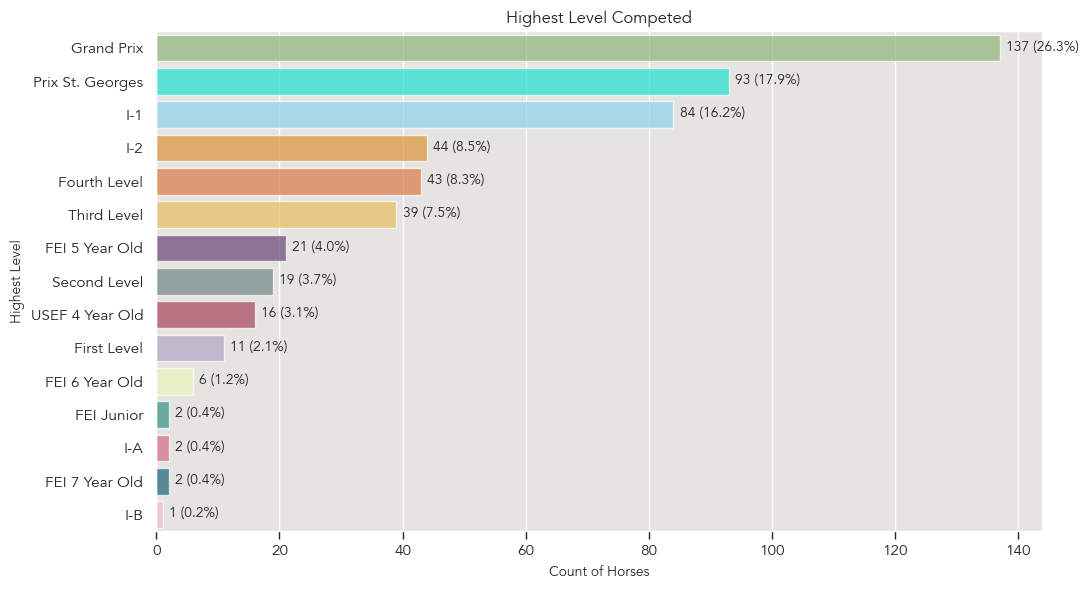

In [1337]:
# create a countplot to display the breakdown of highest level competed

# set figure size
ax = plt.subplots(figsize=(11, 6))

# set counplot options
ax = sns.countplot(
   y = 'HighestLevel',
   data = total_horses,
   palette = color_palette,
   alpha = 0.7,
   order = total_horses['HighestLevel'].value_counts().index
)

# add annotation for count and percentage of each level
for p in ax.patches:
    ax.annotate("{:0,.0f} ({:,.1f}%)".format(p.get_width(), p.get_width()*100/total_horses_count), (p.get_x() + p.get_width() + 1, p.get_y() + .4), ha = 'left', va = 'center')

# set title, xlabel and ylabel
plt.title('Highest Level Competed')
plt.xlabel('Count of Horses')
plt.ylabel('Highest Level')

# save and show figure
plt.tight_layout()
plt.savefig('images/highest-level-breakdown.png')
plt.show()

### FEI (Fédération Equestre Internationale) Competitor Statistics

In [1301]:
# set a variable for the FEI levels
fei_levels = ['Grand Prix', 'I-2', 'I-A', 'I-B', 'I-1', 'Prix St. Georges','FEI Junior']

# get the horses that have competed at FEI 
fei_df = total_horses.loc[(total_horses['HighestLevel'].isin(fei_levels))]

# count the FEI horses by USDF number
fei_count = fei_df['USDFNumber'].nunique()

# print to console
print(f"The number of horses that competed at FEI is {fei_count}.")

The number of horses that competed at FEI is 363.


In [1302]:
# get the percentage of horses that have competed at FEI 
fei_percentage = (fei_count / total_horses_count) * 100

# round the percentage
fei_percentage = round(fei_percentage, 2)

# print to console
print(f"The percentage of horses that competed at FEI is {fei_percentage}%.")

The percentage of horses that competed at FEI is 69.81%.


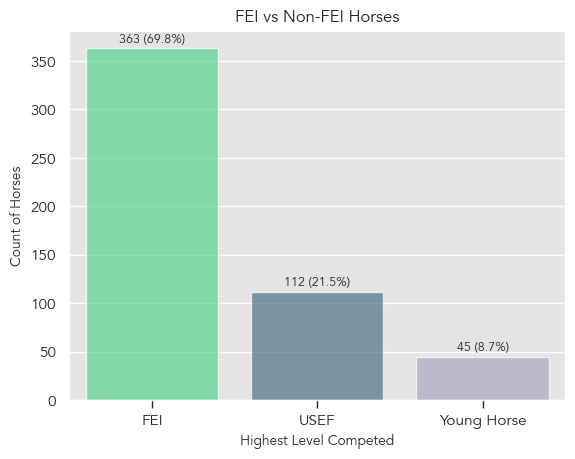

In [1336]:
#  create a countplot to visualize FEI vs non-FEI horse data

fei_vs_non = total_horses

fei = {'Grand Prix', 'I-2', 'I-A', 'I-B', 'I-1', 'Prix St. Georges','FEI Junior'}
usef = {'Training Level', 'First Level', 'Second Level', 'Third Level', 'Fourth Level'}
yh = {'USEF 4 Year Old', 'FEI 5 Year Old', 'FEI 6 Year Old', 'FEI 7 Year Old'}

# write a function to evaluate highest level competed and sort into FEI, USEF, and Young Horse groups
def level_sort(level):
     if level in fei:
          return 'FEI'
     elif level in usef:
        return 'USEF'
     elif level in yh:
         return 'Young Horse'


# new column with result of function  
fei_vs_non['LevelGroup'] = fei_vs_non['HighestLevel'].apply(level_sort)

# set options for countplot
ax = sns.countplot(
   x = 'LevelGroup',
   data = total_horses,
   palette = ['#45e98c', '#477590', '#aaa1c8'],
   alpha = .7,
   order = total_horses['LevelGroup'].value_counts().index
)

# add annotation for count and percentage of each level grouping 
for p in ax.patches:
    ax.annotate("{:0,.0f} ({:,.1f}%)".format(p.get_height(), p.get_height()*100/total_horses_count), (p.get_x() + p.get_width()/2, p.get_height() + 3), ha = 'center', va = 'bottom', fontsize=9)

# set title, xlabel, and ylabel
plt.title('FEI vs Non-FEI Horses')
plt.xlabel('Highest Level Competed')
plt.ylabel('Count of Horses')

# save and show figure
plt.savefig('images/fei-vs-non-fei.png')
plt.show()

### Breakdown of FEI Competitors by Highest Level of Competition Achieved


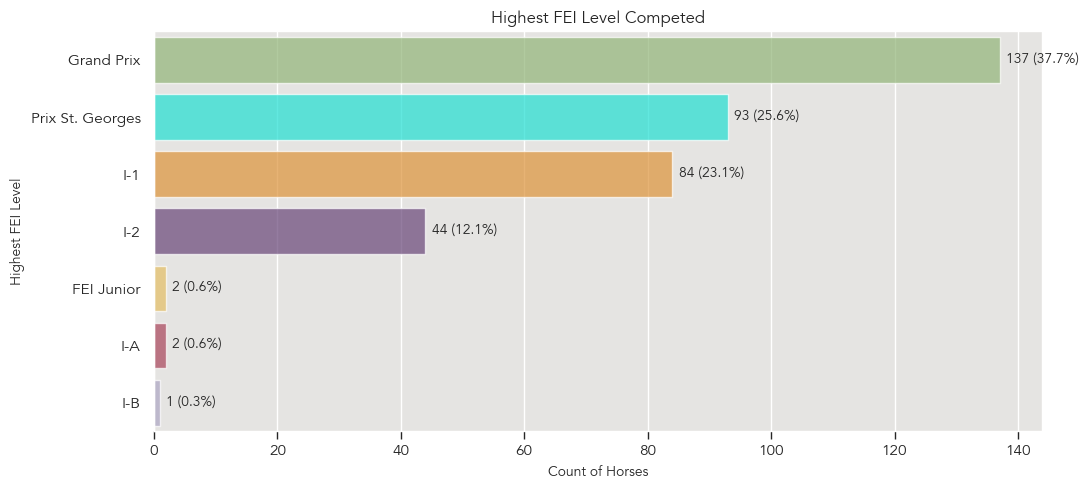

In [1335]:
# create a countplot to display the breakdown of highest FEI level competed

# get the count of horses at each FEI level
fei_level_groups = total_horses[(total_horses['HighestLevel'].isin(fei_levels))]

# set figure size
ax = plt.subplots(figsize=(11, 5))

# set counplot options
ax = sns.countplot(
   y = 'HighestLevel',
   data = fei_level_groups,
   palette = color_palette_10,
   alpha = 0.7,
   order = fei_level_groups['HighestLevel'].value_counts().index
)

# add annotation for count and percentage of each level
for p in ax.patches:
    ax.annotate("{:0,.0f} ({:,.1f}%)".format(p.get_width(), p.get_width()*100/fei_count), (p.get_x() + p.get_width() + 1, p.get_y() + .4), ha = 'left', va = 'center')

# set title, xlabel and ylabel
plt.title('Highest FEI Level Competed')
plt.xlabel('Count of Horses')
plt.ylabel('Highest FEI Level')

# save and show figure
plt.tight_layout()
plt.savefig('images/fei-level-breakdown.png')
plt.show()

### CDI (Concours de Dressage International) Competitor Statistics


In [680]:
# get the horses that have competed in at least one CDI (any level other than Young Horse divisions)
cdi_horses = total_horses.loc[(total_horses['CDI'] == 'Yes')]

# count the CDI horses by USDF number
cdi_count = cdi_horses['USDFNumber'].nunique()

print(f"The number of CDI competitors is {cdi_count}.")

The number of CDI competitors is 169.


In [1304]:
# get the overall percentage of horses that competed in at least one CDI 
cdi_percentage = (cdi_count / fei_count) * 100

# round the percentage
cdi_percentage = round(cdi_percentage, 2)

# print to console
print(f"The percentage of CDI competitors is {cdi_percentage}%")

The percentage of CDI competitors is 46.56%


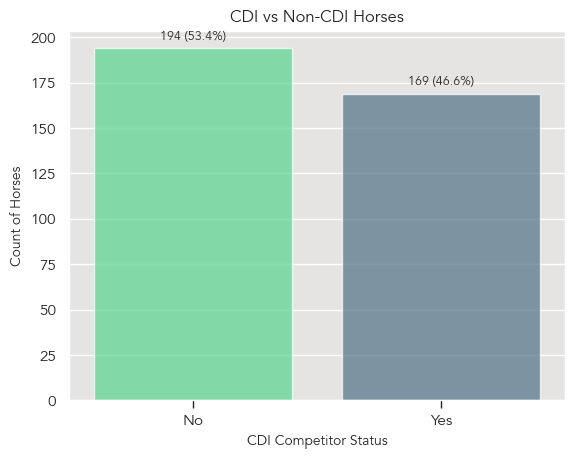

In [1334]:
#  create a countplot to visualize CDI vs non-CDI horse data

# set options for countplot
ax = sns.countplot(
   x = 'CDI',
   data = fei_df,
   palette = ['#45e98c', '#477590'],
   alpha = .7,
   order = fei_df['CDI'].value_counts().index
)

# add annotation for count and percentage of CDI vs non-CDI 
for p in ax.patches:
    ax.annotate("{:0,.0f} ({:,.1f}%)".format(p.get_height(), p.get_height()*100/fei_count), (p.get_x() + p.get_width()/2, p.get_height() + 3), ha = 'center', va = 'bottom', fontsize=9)

# set title, xlabel, and ylabel
plt.title('CDI vs Non-CDI Horses')
plt.xlabel('CDI Competitor Status')
plt.ylabel('Count of Horses')

# save and show figure
plt.savefig('images/cdi-competitors.png')
plt.show()

### Grand Prix Competitor Statistics

In [1316]:
# get the horses that competed to Grand Prix 
grandprix_horses = total_horses.loc[(total_horses['HighestLevel'] == 'Grand Prix')]

# count the Grand Prix horses by USDF number
grandprix_horses_count = grandprix_horses['USDFNumber'].nunique()

# print to console
print(f"The number of Grand Prix horses is {grandprix_horses_count}.")

The number of Grand Prix horses is 137.


In [1317]:
# get the percentage of horses that competed at Grand Prix
grand_prix_percentage = (grandprix_horses_count / total_horses_count) * 100

# round the percentage
grand_prix_percentage = round(grand_prix_percentage, 2)

# print to console
print(f"The percentage of Grand Prix horses is {grand_prix_percentage}%.")

The percentage of Grand Prix horses is 26.35%.


### International Team Horse Statistics

In [1318]:
# select the horses that went on to make an international team (Pan American, World Equestrian, or Olympic Games) 
team_df = merged_df[(merged_df['Year'] <= 2019) & (merged_df['InternationalTeam'] == 'Yes') &
                             (merged_df['Division'].str.contains('USEF4|FEI5|FEI6'))]

# drop duplicates by USDF number
team_df = team_df.drop_duplicates(subset='USDFNumber')

# drop unnecessary columns
team_df = team_df.drop(columns =['Year', 'Division', 'CDI Competitor', 'USDFNumber', 'OverallScore', 'OverallPlacing','Highest Level', 'InternationalTeam'])

# show dataframe
team_df

# print to markdown
#print(team_df.to_markdown())

,Horse,Sire,Damsire,Country Bred,Breeder,Studbook,Team Made
166,Grandioso,Grosso Z,Palisandergrund,Germany,Willi Hillebrecht,Westfalen,Pan American Games
238,Selten HW,Sandro Hit,Hohenstein,USA,Irene Hoeflich-Wiederhold,Hanoverian,Olympic Games
399,Sanceo,San Remo,Ramiro's Son II,Germany,Gerhard Dustmann,Hanoverian,Olympic Games and Pan American Games
633,Lucky Strike,Lord Laurie,His Highness,Germany,Monika Hartwitch,Hanoverian,Pan American Games


In [1326]:
# get the percentage of horses that made an international team

# get the count of team horses
team_count = len(team_df)

# calculate the percentage
#team_percentage = (team_count / total_horses_count) * 100

team_percentage = (team_count / fei_count) * 100

# round the percentage
team_percentage = round(team_percentage, 2)

# print to console
print(f"The percentage of horses that made an international team is {team_percentage}%")

The percentage of horses that made an international team is 1.1%


### Summary Statistics for Competitive Outcomes

In [1321]:
# create summary table of overall horse statistics

horse_summary = pd.DataFrame({"Total Horses": [total_horses_count], "Total FEI Horses": fei_count,
                            "Percentage of FEI Horses": fei_percentage, 
                            "Total CDI Horses": cdi_count,
                            "Percentage of CDI Horses": cdi_percentage,
                            "Total Grand Prix Horses": grandprix_horses_count,
                            "Percentage of Grand Prix Horses": grand_prix_percentage,
                            "Total Team Horses": team_count,
                            "Percentage of Team Horses": team_percentage})

# add formatting 
horse_summary["Percentage of FEI Horses"] = horse_summary["Percentage of FEI Horses"].map("{:.2f}%".format)
horse_summary["Percentage of CDI Horses"] = horse_summary["Percentage of CDI Horses"].map("{:.2f}%".format)
horse_summary["Percentage of Grand Prix Horses"] = horse_summary["Percentage of Grand Prix Horses"].map("{:.2f}%".format)
horse_summary["Percentage of Team Horses"] = horse_summary["Percentage of Team Horses"].map("{:.2f}%".format)


# show dataframe
horse_summary

,Total Horses,Total FEI Horses,Percentage of FEI Horses,Total CDI Horses,Percentage of CDI Horses,Total Grand Prix Horses,Percentage of Grand Prix Horses,Total Team Horses,Percentage of Team Horses
0,520,363,69.81%,169,46.56%,137,26.35%,4,0.77%


### Highest Level Achieved by Placing

In [1322]:
# get the number of FEI horses that placed in the top 10 of their division at the championships 

# top placing variable for places 1-10
top_placing = [1,2,3,4,5,6,7,8,9,10]

# get FEI horses placing in the top ten
top_ten = championship_df[(championship_df['OverallPlacing'].isin(top_placing)) & (championship_df['HighestLevel'].isin(fei_levels))
                          & (championship_df['Year'] <= 2019) &
                             (championship_df['Division'].str.contains('USEF4|FEI5|FEI6'))]

# drop duplicates by USDF number
top_ten = top_ten.drop_duplicates(subset='USDFNumber')

# count the horses that placed in the top ten
top_ten_count = top_ten['USDFNumber'].count()

# print to console
print(f"{top_ten_count} FEI horses placed in the top 10 of their division at championships.")




280 FEI horses placed in the top 10 of their division at championships.


In [1323]:
# get the percentage of FEI horses in the top ten of their division

# calculate the percentage
top_ten_percentage = (top_ten_count / fei_count) * 100

# round the percentage
top_ten_percentage = round(top_ten_percentage, 2)

# print to console
print(f"The percentage of FEI horses placing in the top ten of their division at championships is {top_ten_percentage}%.")

The percentage of FEI horses placing in the top ten of their division at championships is 77.13%.


In [1324]:
# get the number of FEI horses that placed in the bottom 10 of their division 

# bottom placing variable for places out of the top ten
lower_placing = [11,12,13,14,15,16,17,18,19,20]

# get FEI horses placing in the bottom ten
bottom_ten = championship_df[(championship_df['OverallPlacing'].isin(lower_placing)) & (championship_df['HighestLevel'].isin(fei_levels))
                          & (championship_df['Year'] <= 2019) &
                             (championship_df['Division'].str.contains('USEF4|FEI5|FEI6'))]

# drop duplicates by USDF number
bottom_ten = bottom_ten.drop_duplicates(subset='USDFNumber')

# get count of bottom ten by USDF number
bottom_ten_count = bottom_ten['USDFNumber'].count()

# print to console
print(f"{bottom_ten_count} FEI horses placed in the bottom 10 of their division at championships.")

111 FEI horses placed in the bottom 10 of their division at championships.


In [1325]:
# get the percentage of FEI horses in the top ten of their division

# calculate the percentage
bottom_ten_percentage = (bottom_ten_count / fei_count) * 100

# round the percentage
bottom_ten_percentage = round(bottom_ten_percentage, 2)

# print to console
print(f"The percentage of FEI horses placing in the bottom ten of their division at championships is {bottom_ten_percentage}%.")

The percentage of FEI horses placing in the bottom ten of their division at championships is 30.58%.


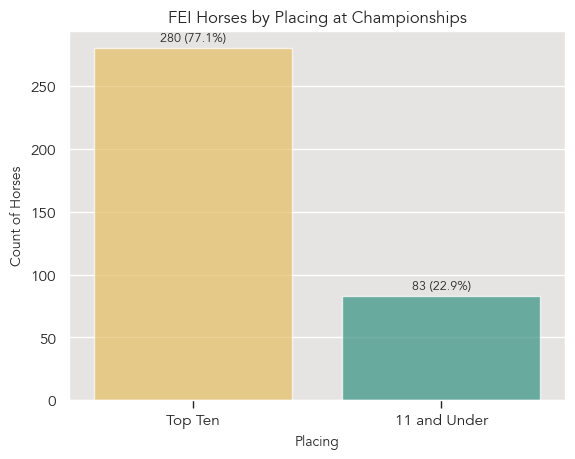

In [1333]:
#  create a countplot to visualize the percentage of FEI horses that placed in the top ten vs bottom ten

# concatonate top ten and bottom ten dataframes
frames = [top_ten, bottom_ten]
placing_group = pd.concat(frames)

# write a function to evaluate if placing is top ten or not
def get_top_ten(placing):
    if placing <= 10:
        return 'Top Ten'
    else:
        return '11 and Under'

# new column with result of function  
placing_group['TopTen'] = placing_group['OverallPlacing'].apply(get_top_ten)

# sort values and drop duplicates, this way ensures if a horse placed in the top ten and lower that we keep the top ten result
placing_group = placing_group.sort_values('TopTen').drop_duplicates(subset='USDFNumber', keep='last')

# set options for countplot
ax = sns.countplot(
   x = 'TopTen',
   data = placing_group,
   palette = ['#f9c74f', '#25a18b'],
   alpha = .7,
   order = placing_group['TopTen'].value_counts().index
)

# add annotation for count and percentage of CDI vs non-CDI 
for p in ax.patches:
    ax.annotate("{:0,.0f} ({:,.1f}%)".format(p.get_height(), p.get_height()*100/fei_count), (p.get_x() + p.get_width()/2, p.get_height() + 3), ha = 'center', va = 'bottom', fontsize=9)

# set title, xlabel, and ylabel
plt.title('FEI Horses by Placing at Championships')
plt.xlabel('Placing')
plt.ylabel('Count of Horses')

# save and show figure
plt.savefig('images/top-ten-vs-bottom-ten.png')
plt.show()

### Grand Prix Horses by Placing

In [1277]:
# get Grand Prix horses placing in the top ten
gp_top_ten = championship_df[(championship_df['OverallPlacing'].isin(top_placing)) & (championship_df['HighestLevel'] == 'Grand Prix')
                          & (championship_df['Year'] <= 2019) &
                             (championship_df['Division'].str.contains('USEF4|FEI5|FEI6'))]

# drop duplicates by USDF number
gp_top_ten = gp_top_ten.drop_duplicates(subset='USDFNumber')

# get the count of Grand Prix horses that placed in the top ten
gp_top_ten_count = gp_top_ten['USDFNumber'].count()

# print to console
print(f"{gp_top_ten_count} Grand Prix horses placed in the top 10 of their division.")

124 Grand Prix horses placed in the top 10 of their division.


In [1278]:
# get the percentage of horses that made it to Grand Prix that placed in the top ten of their division

# calculate the percentage
gp_top_ten_percentage = (gp_top_ten_count / grandprix_horses_count) * 100

# round the percentage
gp_top_ten_percentage = round(gp_top_ten_percentage, 2)

# print to console
print(f"The percentage of Grand Prix horses that placed in the top ten of their division is {gp_top_ten_percentage}%")

The percentage of Grand Prix horses that placed in the top ten of their division is 90.51%


/var/folders/7n/mspq2xwj6yz13bx09w_kdbzc0000gn/T/ipykernel_95091/831058328.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gp_placings['TopTen'] = gp_placings['OverallPlacing'].apply(get_top_ten)


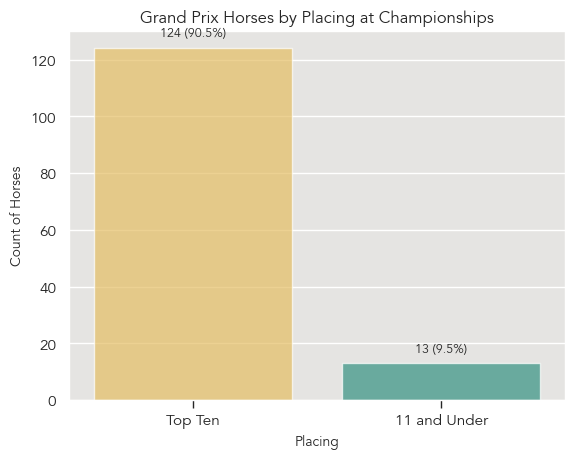

In [1332]:
# create a countplot of Grand Prix horses that placed in the top ten of their division

# get all Grand Prix horses
gp_placings = championship_df.loc[(championship_df['HighestLevel'] == 'Grand Prix')
                          & (championship_df['Year'] <= 2019) &
                             (championship_df['Division'].str.contains('USEF4|FEI5|FEI6'))]


# new column with result of function  
gp_placings['TopTen'] = gp_placings['OverallPlacing'].apply(get_top_ten)

# sort values and drop duplicates, this way ensures if a horse placed in the top ten and lower that we keep the top ten result
gp_placings = gp_placings.sort_values('TopTen').drop_duplicates(subset='USDFNumber', keep='last')

# set options for countplot
ax = sns.countplot(
   x = 'TopTen',
   data = gp_placings,
   palette = ['#f9c74f', '#25a18b'],
   alpha = .7,
   order = gp_placings['TopTen'].value_counts().index
)

# add annotation for count and percentage of CDI vs non-CDI 
for p in ax.patches:
    ax.annotate("{:0,.0f} ({:,.1f}%)".format(p.get_height(), p.get_height()*100/grandprix_horses_count), (p.get_x() + p.get_width()/2, p.get_height() + 3), ha = 'center', va = 'bottom', fontsize=9)

# set title, xlabel, and ylabel
plt.title('Grand Prix Horses by Placing at Championships')
plt.xlabel('Placing')
plt.ylabel('Count of Horses')

# save and show figure
plt.savefig('images/gp-top-ten-placing.png')
plt.show()

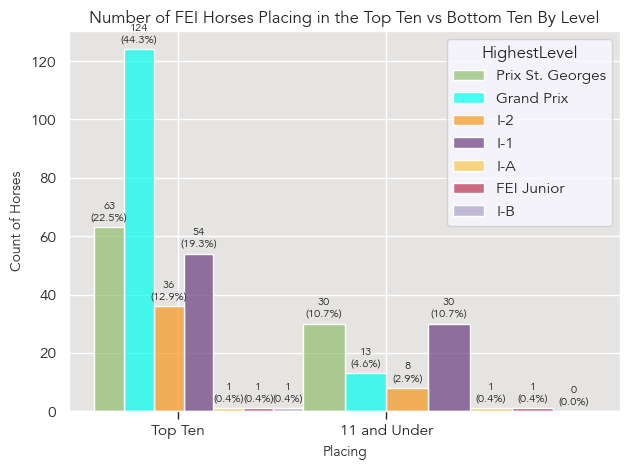

In [1331]:
# create a histogram of FEI horses placing in the top ten vs the bottom ten at championships by level

# set up bins and labels
placing_bins = [1, 11, 25]
placing_labels = ['Top Ten', '11 and Under']

# set up histogram
ax = sns.histplot(x='OverallPlacing', bins=placing_bins, hue='HighestLevel', palette=color_palette_10, alpha=0.7,multiple='dodge', data=placing_group)

# add annotation for count and percentage of each level
for p in ax.patches:
    ax.annotate("{:0,.0f}\n({:,.1f}%)".format(p.get_height(), p.get_height()*100/top_ten_count), (p.get_x() + p.get_width()/2, p.get_height() + 1), ha = 'center', va = 'bottom', fontsize=8)

# set title, xlabel, and ylabel
ax.set_title('Number of FEI Horses Placing in the Top Ten vs Bottom Ten By Level')
ax.set_xlabel('Placing')
ax.set_ylabel('Count of Horses')

# set xticks and xtick labels
ax.set_xticks([5,15])
ax.set_xticklabels(placing_labels)

# save and show figure
plt.tight_layout()
plt.savefig('images/fei-by-placing.png')
plt.show()



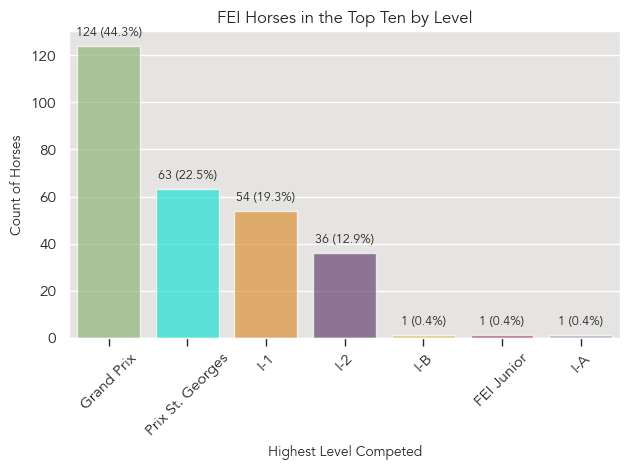

In [1330]:
# create countplot of FEI horses placing in the top ten by highest level competed

# set options for countplot
ax = sns.countplot(
   x = 'HighestLevel',
   data = top_ten,
   palette = color_palette_10,
   alpha = 0.7,
   order = top_ten['HighestLevel'].value_counts().index
)

# add annotation for count and percentage of each level
for p in ax.patches:
    ax.annotate("{:0,.0f} ({:,.1f}%)".format(p.get_height(), p.get_height()*100/top_ten_count), (p.get_x() + p.get_width()/2, p.get_height() + 3), ha = 'center', va = 'bottom', fontsize=9)

# set title, xlabel, and ylabel
plt.title('FEI Horses in the Top Ten by Level')
plt.ylabel('Count of Horses')
plt.xlabel('Highest Level Competed')

# rotate xticks
plt.xticks(rotation=45)

# save and show figure
plt.tight_layout()
plt.savefig('images/fei-top-ten-by-level.png')
plt.show()

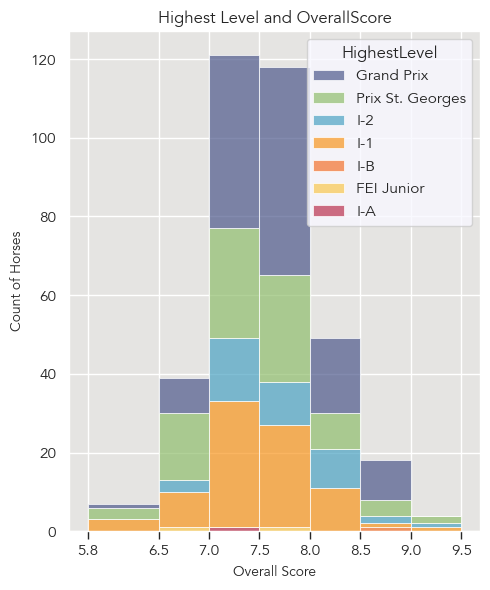

In [1282]:
# create histogram of scores by sire for the Young Horse divisions

# set up bins 
score_bins = [5.8, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5]

f, ax = plt.subplots(figsize=(5, 6))
#sns.despine(f)

colors = {'#ba324f', '#f3722c', '#f8961e', '#f9c74f', '#90be6d', '#25a18b', '#4ba3c3', '#277da1', '#aaa1c8', '#4e598c', '#d9ed92', '#e75a7c'}

# set up histogram
ax = sns.histplot(x='OverallScore', bins=score_bins, hue='HighestLevel', palette=colors, multiple='stack', data=fei_df,
    linewidth=0.5, alpha=0.7)

# set xticks, xlabel, and title
ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
ax.set_xticks([5.8,6.5,7.0,7.5,8.0,8.5,9.0,9.5])
ax.set_title('Highest Level and OverallScore')
ax.set_xlabel('Overall Score')
ax.set_ylabel('Count of Horses')

# save and show figure
plt.tight_layout()
plt.savefig('images/fei-by-score.png')
plt.show()

/var/folders/7n/mspq2xwj6yz13bx09w_kdbzc0000gn/T/ipykernel_95091/1478728224.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scores_df['ScoreRank'] = scores_df['OverallScore'].apply(check_score)


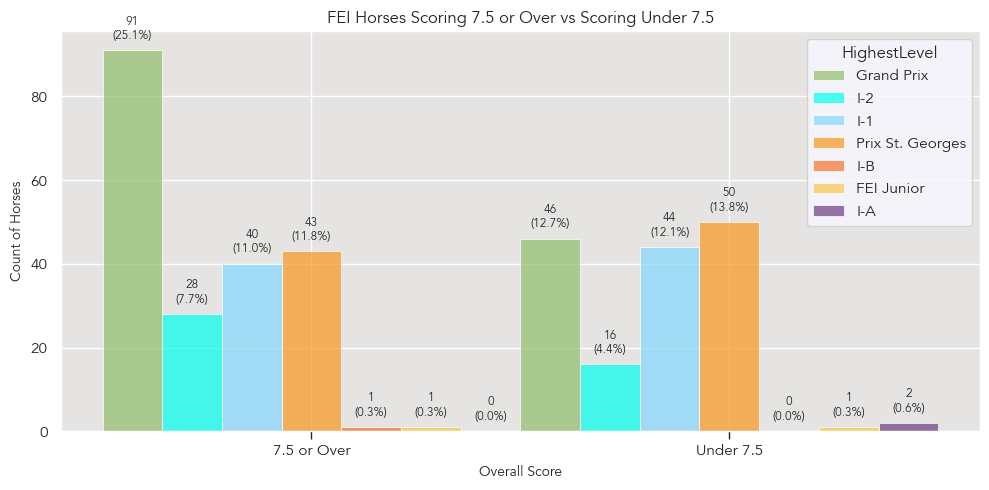

In [1327]:
# create a histogram of horses at the FEI level that scored 7.5 or higher vs under 7.5

scores_df = championship_df.loc[(championship_df['Year'] <= 2019) &
                            (championship_df['Division'].str.contains('USEF4|FEI5|FEI6')) & (championship_df['HighestLevel'].isin(fei_levels))]

ax = plt.subplots(figsize=(10, 5))

# write a function to evaluate if score is equal to/over 7.5 or not
def check_score(score):
    if score >= 7.5:
        return '7.5 or Over'
    else:
        return 'Under 7.5'

# new column with result of function  
scores_df['ScoreRank'] = scores_df['OverallScore'].apply(check_score)

# sort values and drop duplicates, this way ensures if a horse scored both above and below 7.5 that we keep the higher score
scores_df = scores_df.sort_values('ScoreRank').drop_duplicates(subset='USDFNumber', keep='first')

# set up histogram
ax = sns.histplot(x='ScoreRank',  hue='HighestLevel', palette=color_palette, alpha=0.7, multiple='dodge', linewidth=0.5, data=scores_df)

# add annotation for count and percentage of each level
for p in ax.patches:
    ax.annotate("{:0,.0f}\n({:,.1f}%)".format(p.get_height(), p.get_height()*100/fei_count), (p.get_x() + p.get_width()/2, p.get_height() + 2), ha = 'center', va = 'bottom', fontsize=8.5)

# set title, xlabel, and ylabel
plt.title('FEI Horses Scoring 7.5 or Over vs Scoring Under 7.5')
plt.ylabel('Count of Horses')
plt.xlabel('Overall Score')

# save and show figure
plt.tight_layout()
plt.savefig('images/fei-by-overall-score-level-breakdown.png')
plt.show()


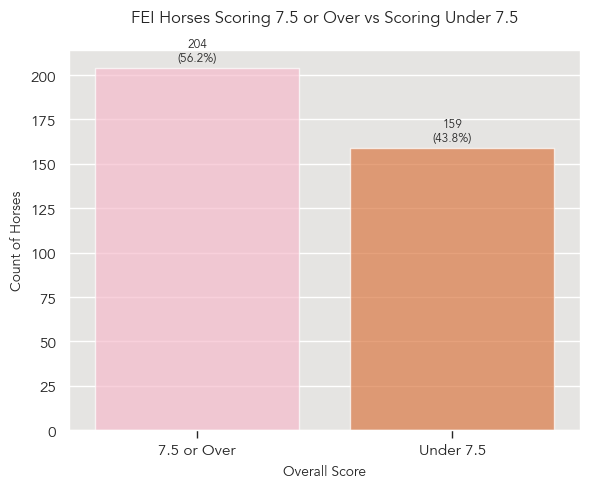

In [1329]:
ax = plt.subplots(figsize=(6, 5))

# set options for countplot
ax = sns.countplot(
   x = 'ScoreRank',
   data = scores_df,
   palette = ['#ffb3c8', '#f3722c'],
   alpha = .7,
   order = scores_df['ScoreRank'].value_counts().index
)

# add annotation for count and percentage of each score group
for p in ax.patches:
    ax.annotate("{:0,.0f}\n({:,.1f}%)".format(p.get_height(), p.get_height()*100/fei_count), (p.get_x() + p.get_width()/2, p.get_height() + 2), ha = 'center', va = 'bottom', fontsize=8.5)

# set title, xlabel, and ylabel
ax.set_title('FEI Horses Scoring 7.5 or Over vs Scoring Under 7.5', pad=20)
plt.ylabel('Count of Horses')
plt.xlabel('Overall Score')

# save and show figure
plt.tight_layout()
plt.savefig('images/fei-by-overall-score.png')
plt.show()

## Analysis of Scores by Division, 2002-2023

### Summary Statistics for Scores

In [1023]:
# group the median scores by division and overall score 
score_groups = championship_df.groupby(['Division'])['OverallScore']

# count the number of scores in each division
score_group_count = championship_df.groupby(['Division'])['OverallScore'].count()

# create a dataframe of summary statistics for all divisions over all years
score_summary = pd.DataFrame({"Number of Scores": score_group_count,
                             "Mean Score": score_groups.mean(),
                              "Median Score": score_groups.median(),
                              "Standard Deviation": score_groups.std(),
                              "Variance": score_groups.var()}) 

# show dataframe
score_summary

# print to markdown
#print(score_summary.to_markdown())


,Number of Scores,Mean Score,Median Score,Standard Deviation,Variance
Division,,,,,
DHGP,121,64.192818,64.8880,6.624170,43.879629
DHPSG,241,66.490763,67.3390,5.706541,32.564612
FEI5,291,7.530285,7.5840,0.872500,0.761256
FEI6,276,7.377841,7.5040,1.012005,1.024154
FEI7,28,70.621929,71.3295,8.939749,79.919104
USEF4,267,7.592322,7.6200,0.801735,0.642779


### USEF 4 Year Old Analysis

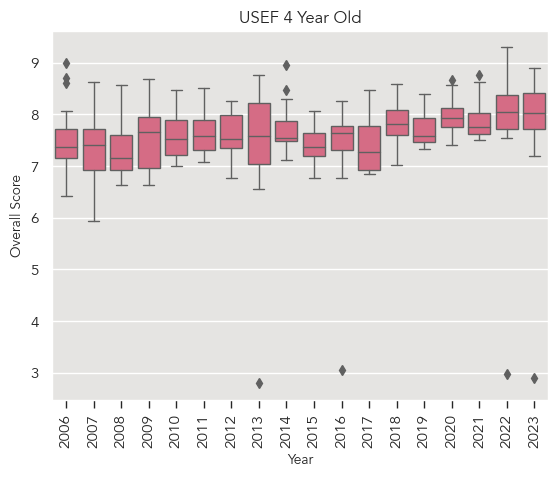

|      |   Year | Division   | Horse          |   OverallPlacing | HighestLevel     | CDI   |   USDFNumber |   OverallScore |
|-----:|-------:|:-----------|:---------------|-----------------:|:-----------------|:------|-------------:|---------------:|
|  176 |   2007 | USEF4      | Rebecca        |               20 | Second Level     | No    |      1063158 |          5.94  |
|  525 |   2013 | USEF4      | Floretienne    |               14 | Grand Prix       | Yes   |      1101450 |          2.792 |
|  717 |   2016 | USEF4      | Jagger         |               14 | Prix St. Georges | Yes   |      1111241 |          3.048 |
| 1128 |   2022 | USEF4      | Furst Dream    |                1 | FEI 5 Year Old   | No    |      1150621 |          9.292 |
| 1140 |   2022 | USEF4      | Fantastic M.R. |               13 | First Level      | No    |      1150825 |          2.976 |
| 1223 |   2023 | USEF4      | Maisie CF      |               16 | USEF 4 Year Old  | No    |      1149166 |          

In [1300]:
# select USEF 4 Year Old scores
four_year_old_scores = championship_df.loc[(championship_df['Division'].str.contains('USEF4'))]

# calculate IQR for column OverallScore
Q1 = four_year_old_scores['OverallScore'].quantile(0.25)
Q3 = four_year_old_scores['OverallScore'].quantile(0.75)
IQR = Q3 - Q1

# create boxplot to visualize outliers
ax = sns.boxplot(data=four_year_old_scores, x='Year', y='OverallScore', color='#e75a7c')

# set title and ylabel
plt.title('USEF 4 Year Old')
plt.ylabel('Overall Score')

# rotate xticks
plt.xticks(rotation=90)

# save and show figure
plt.savefig('images/usef4-boxplot.png')
plt.show()

# identify outliers
threshold = 1.5
outliers = four_year_old_scores[(four_year_old_scores['OverallScore'] < Q1 - threshold * IQR) | (four_year_old_scores['OverallScore'] > Q3 + threshold * IQR)]
print(outliers.to_markdown())

# drop the outliers that are the result of horses participating in only one half of the competition, resulting in an artificially low score
four_year_old_scores = four_year_old_scores.drop(four_year_old_scores[four_year_old_scores['OverallScore'] <= 5.8].index)


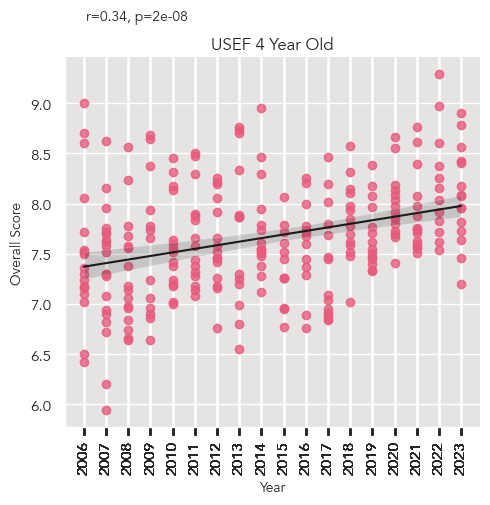

In [1066]:
# create linear regression of USEF Four Year Old division scores
four = sns.lmplot(data=four_year_old_scores, x='Year', y='OverallScore', col='Division',line_kws={'color': 'k'}, scatter_kws={'color': '#e75a7c'}).set(title='USEF 4 Year Old')

# add pearsonr annotation
def annotate(data, **kws):
    r, p = st.pearsonr(data['Year'], data['OverallScore'])
    four = plt.gca()
    four.text(.05, 1.1, 'r={:.2f}, p={:.2g}'.format(r, p),
            transform=four.transAxes)
    
four.map_dataframe(annotate)

# set xticks for better display
plt.xticks(four_year_old_scores['Year'], rotation=90)
plt.ylabel('Overall Score')

# save and show figure
plt.savefig('images/usef4-scatter.png')
plt.show()

### FEI 5 Year Old Analysis

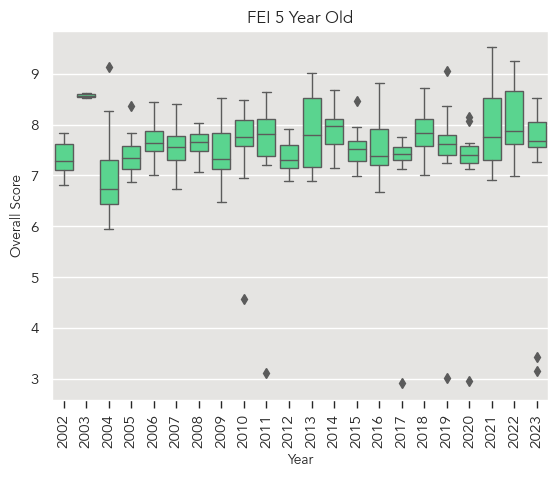

|      |   Year | Division   | Horse                |   OverallPlacing | HighestLevel     | CDI   |   USDFNumber |   OverallScore |
|-----:|-------:|:-----------|:---------------------|-----------------:|:-----------------|:------|-------------:|---------------:|
|   14 |   2004 | FEI5       | Royal Prince         |                1 | Prix St. Georges | No    |      1016896 |          9.14  |
|   30 |   2004 | FEI5       | Finnegan             |               17 | Prix St. Georges | No    |        37180 |          6.22  |
|   31 |   2004 | FEI5       | Cacique              |               18 | I-1              | Yes   |      1007175 |          5.94  |
|  328 |   2010 | FEI5       | Desaronno            |               14 | I-A              | No    |      1078702 |          4.56  |
|  373 |   2011 | FEI5       | Folkestone OLD       |               15 | I-1              | Yes   |      1089283 |          3.112 |
|  500 |   2013 | FEI5       | Fashion Designer OLD |                1 | I-2

In [1087]:
# select FEI 5 Year Old scores
five_year_old_scores = championship_df.loc[(championship_df['Division'].str.contains('FEI5'))]

# calculate IQR for column OverallScore
Q1 = five_year_old_scores['OverallScore'].quantile(0.25)
Q3 = five_year_old_scores['OverallScore'].quantile(0.75)
IQR = Q3 - Q1

# create boxplot to visualize outliers
ax = sns.boxplot(data=five_year_old_scores, x='Year', y='OverallScore', color='#45e98c')

# set title and ylabel
plt.title('FEI 5 Year Old')
plt.ylabel('Overall Score')

# rotate xticks
plt.xticks(rotation=90)

# save and show figure
plt.savefig('images/fei5-boxplot.png')
plt.show()

# identify outliers
threshold = 1.5
outliers = five_year_old_scores[(five_year_old_scores['OverallScore'] < Q1 - threshold * IQR) | (five_year_old_scores['OverallScore'] > Q3 + threshold * IQR)]
print(outliers.to_markdown())

# drop the outliers that are the result of horses participating in only one half of the competition, resulting in an artificially low score
five_year_old_scores = five_year_old_scores.drop(five_year_old_scores[five_year_old_scores['OverallScore'] <= 5.7].index)



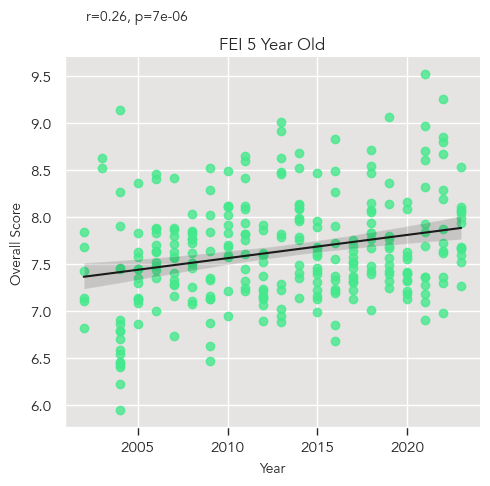

In [894]:
# create linear regression of FEI 5 Year Old division scores
five = sns.lmplot(data=five_year_old_scores, x="Year", y="OverallScore", col="Division", line_kws={'color': 'k'}, scatter_kws={'color': '#45e98c'}).set(title='FEI 5 Year Old')

# add pearsonr annotation
def annotate(data, **kws):
    r, p = st.pearsonr(data['Year'], data['OverallScore'])
    five = plt.gca()
    five.text(.05, 1.1, 'r={:.2f}, p={:.2g}'.format(r, p),
            transform=five.transAxes)
    
five.map_dataframe(annotate)

# set ylabel
plt.ylabel('Overall Score')

# save and show figure
plt.savefig('images/fei5-scatter.png')
plt.show()

### FEI 6 Year Old Analysis

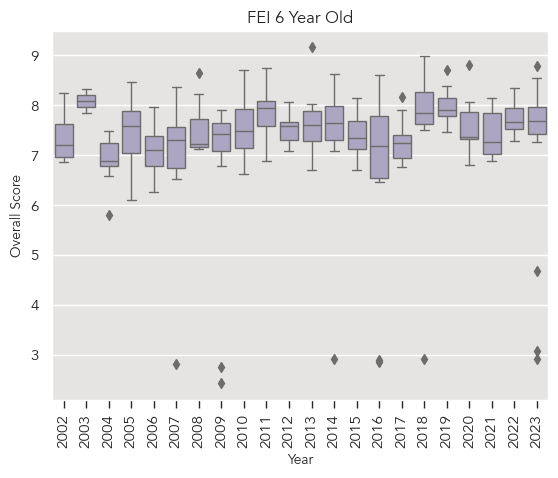

|      |   Year | Division   | Horse            |   OverallPlacing | HighestLevel     | CDI   |   USDFNumber |   OverallScore |
|-----:|-------:|:-----------|:-----------------|-----------------:|:-----------------|:------|-------------:|---------------:|
|   46 |   2004 | FEI6       | Caletino         |               15 | FEI 6 Year Old   | No    |        47196 |          5.8   |
|  156 |   2007 | FEI6       | UB 40            |               14 | Prix St. Georges | No    |      1042261 |          2.808 |
|  261 |   2009 | FEI6       | Bijoux           |               12 | Fourth Level     | No    |      1072366 |          2.744 |
|  262 |   2009 | FEI6       | Reliance         |               13 | Prix St. Georges | No    |      1061628 |          2.424 |
|  488 |   2013 | FEI6       | Vitalis          |                1 | I-1              | Yes   |      1101036 |          9.152 |
|  561 |   2014 | FEI6       | Dancing Hit      |               14 | Prix St. Georges | No    |      110

In [1088]:
# select FEI 6 Year Old scores
six_year_old_scores = championship_df.loc[(championship_df['Division'].str.contains('FEI6'))]

# calculate IQR for column OverallScore
Q1 = six_year_old_scores['OverallScore'].quantile(0.25)
Q3 = six_year_old_scores['OverallScore'].quantile(0.75)
IQR = Q3 - Q1

# create boxplot to visualize outliers
ax = sns.boxplot(data=six_year_old_scores, x='Year', y='OverallScore', color='#aaa1c8')


# set title and ylabel
plt.title('FEI 6 Year Old')
plt.ylabel('Overall Score')

# set xticks
plt.xticks(rotation=90)

# save and show figure
plt.savefig('images/fei6-boxplot.png')
plt.show()

# identify outliers
threshold = 1.5
outliers = six_year_old_scores[(six_year_old_scores['OverallScore'] < Q1 - threshold * IQR) | (six_year_old_scores['OverallScore'] > Q3 + threshold * IQR)]
print(outliers.to_markdown())

# drop the outliers that are the result of horses participating in only one half of the competition, resulting in an artificially low score
six_year_old_scores = six_year_old_scores.drop(six_year_old_scores[six_year_old_scores['OverallScore'] <= 5.7].index)


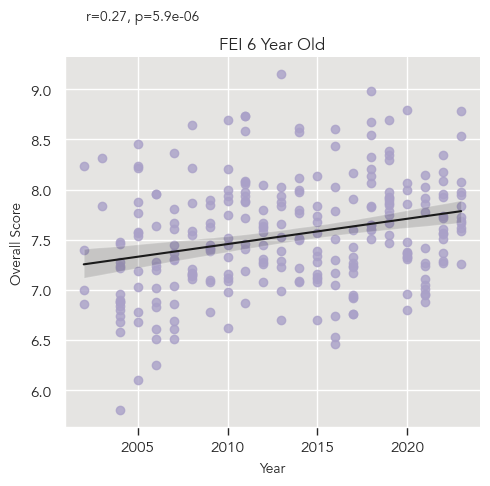

In [640]:
# create linear regression of FEI 6 Year Old division scores
six = sns.lmplot(data=six_year_old_scores, x='Year', y='OverallScore', col='Division', line_kws={'color': 'k'}, scatter_kws={'color': '#aaa1c8'}).set(title='FEI 6 Year Old')

# add pearsonr annotation
def annotate(data, **kws):
    r, p = st.pearsonr(data['Year'], data['OverallScore'])
    six = plt.gca()
    six.text(.05, 1.1, 'r={:.2f}, p={:.2g}'.format(r, p),
            transform=six.transAxes)
    
six.map_dataframe(annotate)

# set ylabel
plt.ylabel('Overall Score')

# save and show figure
plt.savefig('images/fei6-scatter.png')
plt.show()



### Developing Prix St. Georges Analysis

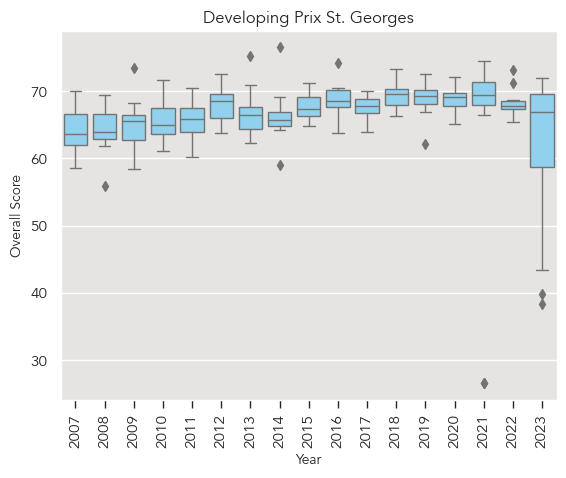

|      |   Year | Division   | Horse                   |   OverallPlacing | HighestLevel     | CDI   |   USDFNumber |   OverallScore |
|-----:|-------:|:-----------|:------------------------|-----------------:|:-----------------|:------|-------------:|---------------:|
|  193 |   2008 | DHPSG      | Amidala                 |               17 | Grand Prix       | Yes   |      1031631 |         55.913 |
|  249 |   2009 | DHPSG      | Collector's Item        |               15 | I-1              | No    |      1035043 |         58.45  |
|  533 |   2014 | DHPSG      | Sanceo                  |                1 | Grand Prix       | Yes   |      1083924 |         76.515 |
| 1023 |   2021 | DHPSG      | WEC's Senor Rubinstein  |               14 | Grand Prix       | Yes   |      1124842 |         26.509 |
| 1024 |   2021 | DHPSG      | Atterupgaards Belafonte |               15 | I-1              | Yes   |      1145410 |         26.49  |
| 1161 |   2023 | DHPSG      | Giovanni-Bell           

In [1089]:
# select scores for Developing PSG division
dhpsg_scores = championship_df.loc[(championship_df['Division'].str.contains('DHPSG'))]

# calculate IQR for column OverallScore
Q1 = dhpsg_scores['OverallScore'].quantile(0.25)
Q3 = dhpsg_scores['OverallScore'].quantile(0.75)
IQR = Q3 - Q1

# create boxplot to visualize outliers
ax = sns.boxplot(data=dhpsg_scores, x='Year', y='OverallScore', color='#83D7FC')

# set title and ylabel
plt.title('Developing Prix St. Georges')
plt.ylabel('Overall Score')

# set xticks
plt.xticks(rotation=90)

# save and show figure
plt.savefig('images/dhpsg-boxplot.png')
plt.show()

# identify outliers
threshold = 1.5
outliers = dhpsg_scores[(dhpsg_scores['OverallScore'] < Q1 - threshold * IQR) | (dhpsg_scores['OverallScore'] > Q3 + threshold * IQR)]
print(outliers.to_markdown())

# drop the outliers that are the result of horses participating in only one half of the competition, resulting in an artificially low score
dhpsg_scores = dhpsg_scores.drop(dhpsg_scores[dhpsg_scores['OverallScore'] <= 54.000].index)



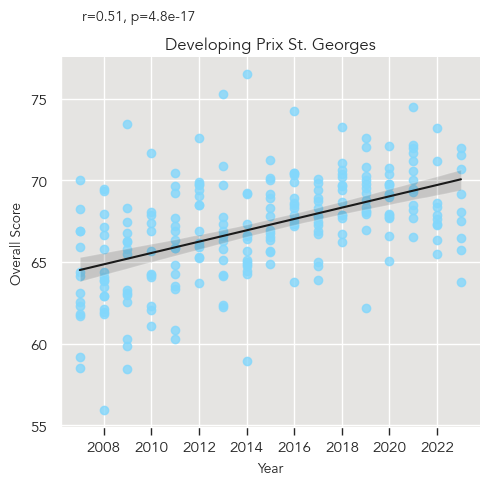

In [642]:
# create linear regression of Developing Prix St. Georges division scores
dhpsg = sns.lmplot(data=dhpsg_scores, x='Year', y='OverallScore', col='Division', line_kws={'color': 'k'}, scatter_kws={'color': '#83D7FC'}).set(title='Developing Prix St. Georges')

# add pearsonr annotation
def annotate(data, **kws):
    r, p = st.pearsonr(data['Year'], data['OverallScore'])
    dhpsg = plt.gca()
    dhpsg.text(.05, 1.1, 'r={:.2f}, p={:.2g}'.format(r, p),
            transform=dhpsg.transAxes)
    
dhpsg.map_dataframe(annotate)

# set ylabel
plt.ylabel('Overall Score')

# save and show figure
plt.savefig('images/dhpsg-scatter.png')
plt.show()

### Developing Grand Prix Analysis

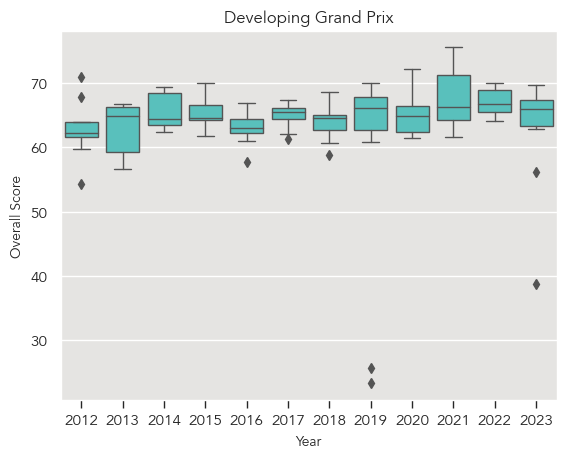

|      |   Year | Division   | Horse                  |   OverallPlacing | HighestLevel   | CDI   |   USDFNumber |   OverallScore |
|-----:|-------:|:-----------|:-----------------------|-----------------:|:---------------|:------|-------------:|---------------:|
|  412 |   2012 | DHGP       | Veva Rose              |                9 | Grand Prix     | No    |      1091827 |         54.271 |
|  473 |   2013 | DHGP       | Elijah                 |                6 | I-2            | No    |      1013250 |         56.649 |
|  869 |   2019 | DHGP       | Faberge Blue           |               14 | Grand Prix     | Yes   |      1107486 |         25.666 |
|  870 |   2019 | DHGP       | Pik L's Donabella HU   |               15 | I-2            | No    |      1099805 |         23.254 |
|  998 |   2021 | DHGP       | Serenade MF            |                1 | Grand Prix     | Yes   |      1103046 |         75.519 |
| 1150 |   2023 | DHGP       | Incredible Jacky       |               10 | I

In [1090]:
# select scores for Developing Grand Prix division
dhgp_scores = championship_df.loc[(championship_df['Division'].str.contains('DHGP'))]


# calculate IQR for column OverallScore
Q1 = dhgp_scores['OverallScore'].quantile(0.25)
Q3 = dhgp_scores['OverallScore'].quantile(0.75)
IQR = Q3 - Q1

# create boxplot to visualize outliers
sns.boxplot(data=dhgp_scores, x='Year', y='OverallScore', color='mediumturquoise')

plt.ylabel('Overall Score')
# set title, save and show figure
plt.title('Developing Grand Prix')
plt.savefig('images/dhgp-boxplot.png')
plt.show()

# identify outliers
threshold = 1.5
outliers = dhgp_scores[(dhgp_scores['OverallScore'] < Q1 - threshold * IQR) | (dhgp_scores['OverallScore'] > Q3 + threshold * IQR)]
print(outliers.to_markdown())

# drop the outliers that are the result of horses participating in only one half of the competition, resulting in an artificially low score
dhgp_scores = dhgp_scores.drop(dhgp_scores[dhgp_scores['OverallScore'] <= 54.000].index)


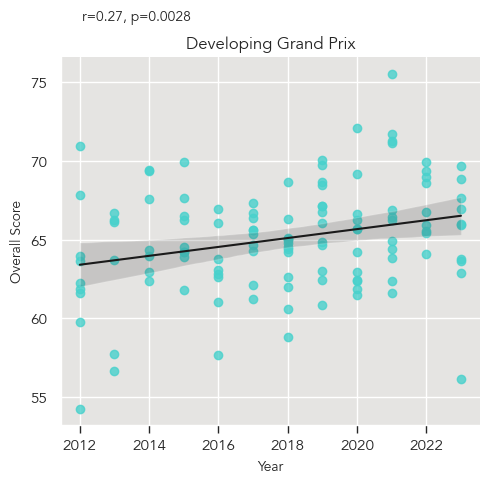

In [646]:
# create linear regression of Developing Grand Prix division scores
gp = sns.lmplot(data=dhgp_scores, x='Year', y='OverallScore', line_kws={'color': 'k'}, scatter_kws={'color': 'mediumturquoise'}).set(title='Developing Grand Prix', ylabel=('Overall Score'))

# add pearsonr annotation
def annotate(data, **kws):
    r, p = st.pearsonr(data['Year'], data['OverallScore'])
    gp = plt.gca()
    gp.text(.05, 1.1, 'r={:.2f}, p={:.2g}'.format(r, p),
            transform=gp.transAxes)
    
gp.map_dataframe(annotate)

# save and show figure
plt.savefig('images/dhgp-scatter.png')
plt.show()

## Bloodline and Breeding Data Analysis, 2002-2023

### Summary Statistics of Median Score by Sire - Young Horse Divisions

In [262]:
# get the scores, sire, and division over all years (2002-2023)
sire_score = merged_df[['Sire','OverallScore', 'Division']]

In [1028]:
# since the scoring for YH and DH divisions is different, we separate out the scores for YH divisions only
# we also drop low scores that are outliers due to horses completing only one half of the competition
yh_sire_score = sire_score.loc[sire_score['Division'].str.contains('USEF4|FEI5|FEI6') & (sire_score['OverallScore'] >= 5.7)]
# get count of scores by sire
yh_sire_score_counts = yh_sire_score['Sire'].value_counts().reset_index()
# create column of score counts
yh_sire_score_counts.columns = ['Sire', 'Score Count']

# merge the dataframes
yh_sire_score_groups = pd.merge(yh_sire_score_counts, yh_sire_score)

# get the sires with 8 or more scores
yh_sire_score_groups = yh_sire_score_groups.loc[(yh_sire_score_groups['Score Count'] >= 8)]

# group by sire
yh_sire_score_groups = yh_sire_score_groups.groupby(["Sire"])["OverallScore"]

# get the counts
yh_sire_score_group_count = yh_sire_score_groups.count()


# create a dataframe of summary statistics for the young horse divisions over all years
yh_sire_score_summary = pd.DataFrame({"Number of Scores": yh_sire_score_group_count,
                           "Mean Score": yh_sire_score_groups.mean(),
                           "Median Score": yh_sire_score_groups.median(),
                           "Standard Deviation": yh_sire_score_groups.std(),
                           "Variance": yh_sire_score_groups.var()}) 

# print to markdown
#print(yh_sire_score_summary.to_markdown())

| Sire             |   Number of Scores |   Mean Score |   Median Score |   Standard Deviation |   Variance |
|:-----------------|-------------------:|-------------:|---------------:|---------------------:|-----------:|
| Apache           |                  9 |      7.65533 |          7.708 |             0.528117 |   0.278908 |
| Belissimo M      |                  8 |      8.062   |          8.208 |             0.594854 |   0.353851 |
| Contucci         |                 10 |      7.628   |          7.452 |             0.81952  |   0.671612 |
| Florencio I      |                  8 |      7.50625 |          7.536 |             0.609313 |   0.371262 |
| Florestan I      |                 11 |      7.369   |          7.4   |             0.385015 |   0.148237 |
| Furstenball      |                 21 |      7.8301  |          7.72  |             0.56074  |   0.31443  |
| Grand Galaxy Win |                 11 |      8.27773 |          8.154 |             0.569092 |   0.323866 |
| Hotline          |                 13 |      7.62323 |          7.58  |             0.502625 |   0.252632 |
| Idocus           |                  8 |      7.702   |          7.56  |             0.831318 |   0.69109  |
| Jazz             |                 14 |      7.764   |          7.758 |             0.722566 |   0.522102 |
| Quaterback       |                  8 |      7.6075  |          7.616 |             0.631752 |   0.399111 |
| Rotspon          |                 10 |      7.5211  |          7.486 |             0.708312 |   0.501706 |
| San Amour        |                  9 |      7.63511 |          7.552 |             0.48282  |   0.233115 |
| Sandro Hit       |                 31 |      7.68797 |          7.636 |             0.525052 |   0.27568  |
| Sir Donnerhall I |                 24 |      7.80379 |          7.718 |             0.382872 |   0.146591 |
| Sir Sinclair     |                  9 |      7.66511 |          7.68  |             0.423529 |   0.179377 |

### Summary Statistics of Median Score by Sire - Developing Horse Divisions

In [1030]:
# since the scoring for YH and DH divisions is different, we separate out the scores for DH divisions only
# we also drop low scores that are outliers due to horses completing only one half of the competition
dh_sire_score = sire_score.loc[sire_score['Division'].str.contains('DHPSG|DHGP') & (sire_score['OverallScore'] >= 45)]
# get count of scores by sire
dh_sire_score_counts = dh_sire_score['Sire'].value_counts().reset_index()
# add column of score counts
dh_sire_score_counts.columns = ['Sire', 'Score Count']

# merge the dataframes
dh_sire_score_groups = pd.merge(dh_sire_score_counts, dh_sire_score)

# get the sires with 8 or more scores
dh_sire_score_groups = dh_sire_score_groups.loc[(dh_sire_score_groups['Score Count'] >= 4)]

# group by sire
dh_sire_score_groups = dh_sire_score_groups.groupby(["Sire"])["OverallScore"]

# get the counts
dh_sire_score_group_count = dh_sire_score_groups.count()


# create a dataframe of summary statistics for all divisions over all years
dh_sire_score_summary = pd.DataFrame({"Number of Scores": dh_sire_score_group_count,
                           "Mean Score": dh_sire_score_groups.mean(),
                           "Median Score": dh_sire_score_groups.median(),
                           "Standard Deviation": dh_sire_score_groups.std(),
                           "Variance": dh_sire_score_groups.var()}) 

# print to markdown
#print(dh_sire_score_summary.to_markdown())

| Sire             |   Number of Scores |   Mean Score |   Median Score |   Standard Deviation |   Variance |
|:-----------------|-------------------:|-------------:|---------------:|---------------------:|-----------:|
| Ampere           |                  4 |      68.3042 |        68.3415 |              2.25245 |    5.07352 |
| Belissimo M      |                  4 |      65.0897 |        65.386  |              4.22503 |   17.8509  |
| Charmeur         |                  5 |      68.5348 |        69.152  |              2.66971 |    7.12733 |
| Contucci         |                  4 |      64.845  |        63.0985 |              6.00224 |   36.0269  |
| Diamond Hit      |                  7 |      67.4623 |        67.774  |              1.72814 |    2.98647 |
| Don Schufro      |                  4 |      65.5627 |        65.278  |              1.60009 |    2.56028 |
| Fidertanz        |                 13 |      67.2732 |        67.807  |              3.24802 |   10.5496  |
| Florencio I      |                  7 |      67.5287 |        67.306  |              1.43564 |    2.06105 |
| Florestan I      |                  6 |      67.1293 |        66.8035 |              1.75294 |    3.07282 |
| Hochadel         |                  5 |      64.0688 |        63.885  |              3.61994 |   13.104   |
| Jazz             |                  7 |      68.4527 |        68.705  |              2.76839 |    7.66396 |
| Johnson          |                  4 |      64.595  |        64.8145 |              1.76534 |    3.11644 |
| Quaterback       |                  6 |      65.7647 |        65.201  |              2.79883 |    7.83345 |
| Romanov          |                  4 |      66.7168 |        66.3945 |              3.42845 |   11.7542  |
| Rotspon          |                  4 |      67.33   |        66.197  |              2.99827 |    8.98964 |
| Rousseau         |                  5 |      65.8092 |        65.67   |              2.13535 |    4.55973 |
| Sandro Hit       |                  9 |      64.6292 |        64.273  |              2.26267 |    5.11968 |
| Sir Donnerhall I |                 10 |      67.8955 |        68.7305 |              3.90009 |   15.2107  |
| UB 40            |                  4 |      66.8538 |        66.955  |              1.20529 |    1.45272 |
| Vivaldi          |                  4 |      69.191  |        68.997  |              2.28054 |    5.20086 |
| Wagnis           |                  4 |      71.1148 |        69.919  |              2.80298 |    7.85668 |

### Score Distribution by Sire - Young Horse Divisions

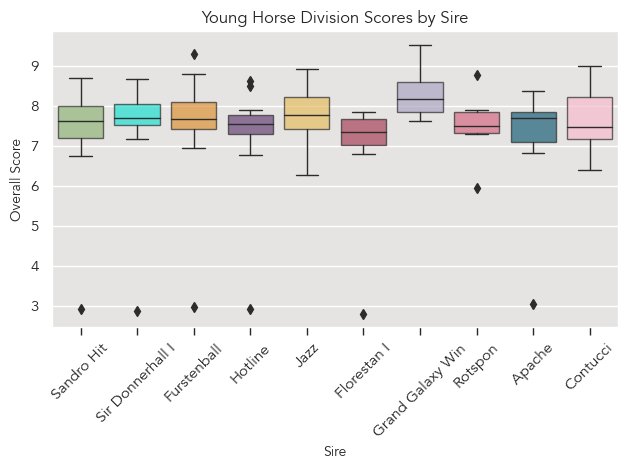

In [1069]:
# select the scores for the YH divisions where there are 10 or more scores for each sire
yh_sire_scores = sire_score.loc[sire_score['Division'].str.contains('USEF4|FEI5|FEI6')]
# get count of scores by sire
yh_sire_score_counts = yh_sire_scores['Sire'].value_counts().reset_index()
# create column of score counts
yh_sire_score_counts.columns = ['Sire', 'Score Count']

# merge the dataframes
yh_sire_scores= pd.merge(yh_sire_score_counts, yh_sire_scores)

# get the sires with 8 or more scores
yh_sire_scores = yh_sire_scores.loc[(yh_sire_scores['Score Count'] >= 10)]

# calculate IQR for column OverallScore
Q1 = yh_sire_scores['OverallScore'].quantile(0.25)
Q3 = yh_sire_scores['OverallScore'].quantile(0.75)
IQR = Q3 - Q1

# create boxplot to visualize outliers
sns.boxplot(data=yh_sire_scores, x='Sire', y='OverallScore', palette=color_palette_10, boxprops=dict(alpha=0.7))

# add title and ylabel
plt.title('Young Horse Division Scores by Sire')
plt.ylabel('Overall Score')

# rotate xticks
plt.xticks(rotation=45)

# save and show figure
plt.tight_layout()
plt.savefig('images/yh-score-by-sire-boxplot.png')
plt.show()

# identify outliers
threshold = 1.5
outliers = yh_sire_scores[(yh_sire_scores['OverallScore'] < Q1 - threshold * IQR) | (yh_sire_scores['OverallScore'] > Q3 + threshold * IQR)]
#print(outliers.to_markdown())

# drop the outliers that are the result of horses participating in only one half of the competition, resulting in an artificially low score
yh_sire_scores = yh_sire_scores.drop(yh_sire_scores[yh_sire_scores['OverallScore'] <= 5.7].index)



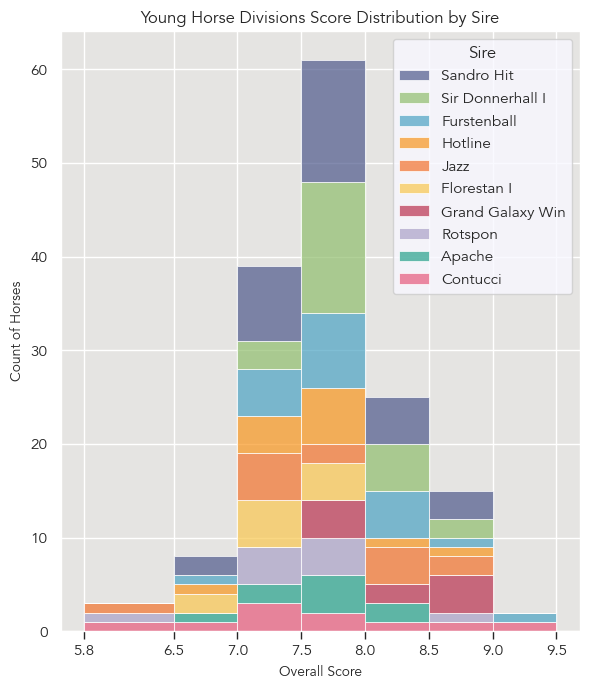

In [1146]:
# create histogram of scores by sire for the Young Horse divisions

# set up bins 
score_bins = [5.8, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5]

f, ax = plt.subplots(figsize=(6, 7))
#sns.despine(f)

colors = {'#ba324f', '#f3722c', '#f8961e', '#f9c74f', '#90be6d', '#25a18b', '#4ba3c3', '#277da1', '#aaa1c8', '#4e598c', '#d9ed92', '#e75a7c'}

# set up histogram
ax = sns.histplot(x='OverallScore', bins=score_bins, hue='Sire', palette=colors,multiple='stack', data=yh_sire_scores,
    linewidth=0.5, alpha=0.7)

# set xticks, xlabel, and title
ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
ax.set_xticks([5.8,6.5,7.0,7.5,8.0,8.5,9.0,9.5])
ax.set_title('Young Horse Divisions Score Distribution by Sire')
ax.set_xlabel('Overall Score')
ax.set_ylabel('Count of Horses')

# save and show figure
plt.tight_layout()
plt.savefig('images/yh-score-by-sire.png')
plt.show()





### Score Distribution by Sire - Developing Horse Divisions

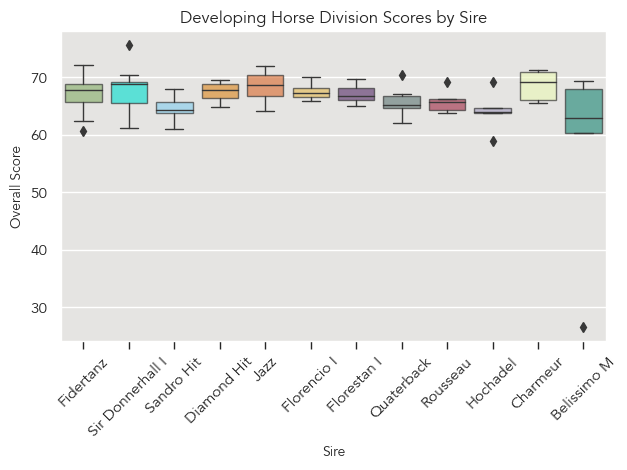

In [1070]:
# select the scores for the DH divisions where there are 5 or more scores per sire
dh_sire_scores = sire_score.loc[sire_score['Division'].str.contains('DHPSG|DHGP')]
# get count of scores by sire
dh_sire_score_counts = dh_sire_scores['Sire'].value_counts().reset_index()
# create column of score counts
dh_sire_score_counts.columns = ['Sire', 'Score Count']

# merge the dataframes
dh_sire_scores= pd.merge(dh_sire_score_counts, dh_sire_scores)

# get the sires with 8 or more scores
dh_sire_scores = dh_sire_scores.loc[(dh_sire_scores['Score Count'] >= 5)]

# calculate IQR for column OverallScore
Q1 = dh_sire_scores['OverallScore'].quantile(0.25)
Q3 = dh_sire_scores['OverallScore'].quantile(0.75)
IQR = Q3 - Q1

# create boxplot to visualize outliers
sns.boxplot(data=dh_sire_scores, x='Sire', y='OverallScore', palette=color_palette, boxprops=dict(alpha=0.7))

# set title and ylabel
plt.title('Developing Horse Division Scores by Sire')
plt.ylabel('Overall Score')

# set xticks
plt.xticks(rotation=45)

# save and show figure 
plt.tight_layout()
plt.savefig('images/dh-score-by-sire-boxplot.png')
plt.show()

# identify outliers
threshold = 1.5
outliers = dh_sire_scores[(dh_sire_scores['OverallScore'] < Q1 - threshold * IQR) | (dh_sire_scores['OverallScore'] > Q3 + threshold * IQR)]
#print(outliers.to_markdown())

# drop the outliers that are the result of horses participating in only one half of the competition, resulting in an artificially low score
dh_sire_scores = dh_sire_scores.drop(dh_sire_scores[dh_sire_scores['OverallScore'] <= 30].index)

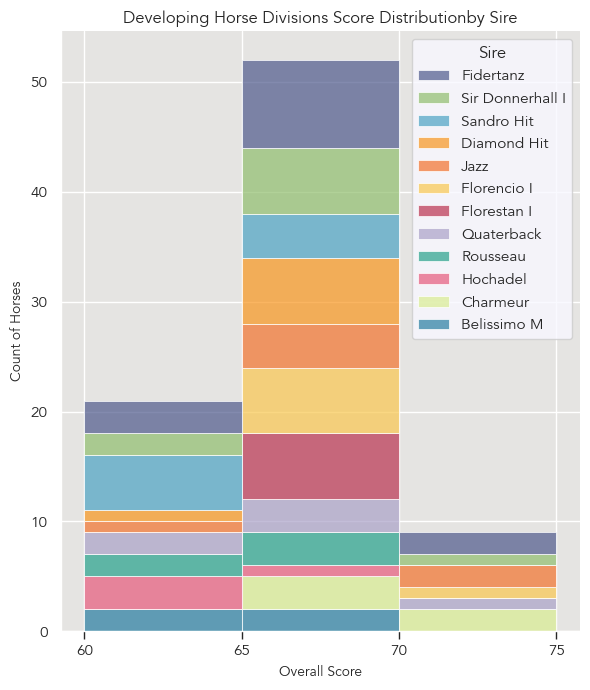

In [1145]:
# create histogram of scores by sire for Developing Horse divisions

# set up bins 
score_bins = [60, 65, 70, 75]

f, ax = plt.subplots(figsize=(6, 7))
sns.despine(f)

# set up histogram
ax = sns.histplot(x='OverallScore', bins=score_bins, hue='Sire', palette=colors, alpha=0.7, multiple='stack', data=dh_sire_scores,
    linewidth=.5)

# set xticks, xlabel, and title
ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
ax.set_xticks([60,65,70,75])
ax.set_title('Developing Horse Divisions Score Distributionby Sire')
ax.set_ylabel('Count of Horses')
ax.set_xlabel('Overall Score')

# show and save figure
plt.tight_layout()
plt.savefig('images/dh-score-by-sire.png')
plt.show()





### Distribution of Competitors by Country Bred

In [901]:
# get the number of horses bred in the USA that competed in the years 2002-2023
usa_count = horse_df[(horse_df['Country'] == 'USA')].count()['USDFNumber']

# print to console
print(f"{usa_count} horses were bred in the USA.")

307 horses were bred in the USA.


In [180]:
# group by country bred and get count of horses for each country
country_groups = horse_df['Country'].value_counts().reset_index()

# set up columns for country and count
country_groups.columns = ['Country', 'Count of Horses']

# print to markdown
#print(country_groups.to_markdown())





|    | Country       |   Count of Horses |
|---:|:--------------|------------------:|
|  1 | USA           |               307 |
|  2 | Germany       |               299 |
|  3 | Netherlands   |               165 |
|  4 | Denmark       |                26 |
|  5 | Canada        |                 7 |
|  6 | Belgium       |                 7 |
|  7 | Spain         |                 5 |
|  8 | Great Britain |                 5 |
|  9 | Norway        |                 4 |
| 10 | Sweden        |                 2 |
| 11 | Australia     |                 1 |
| 12 | France        |                 1 |
| 13 | Brazil        |                 1 |
| 14 | Portugal      |                 1 |
| 15 | Colombia      |                 1 |
| 16 | Italy         |                 1 |

In [1340]:
# get the percentage of horses bred in the USA

# get length of horse dataframe 
all_horses = len(horse_df)

# calculate percentage
usa_percentage = (usa_count / all_horses) * 100

# round the percentage
usa_percentage = round(usa_percentage, 2)

# print to console
print(f"The percentage of horses bred in the USA is {usa_percentage}%.")

The percentage of horses bred in the USA is 36.5%.


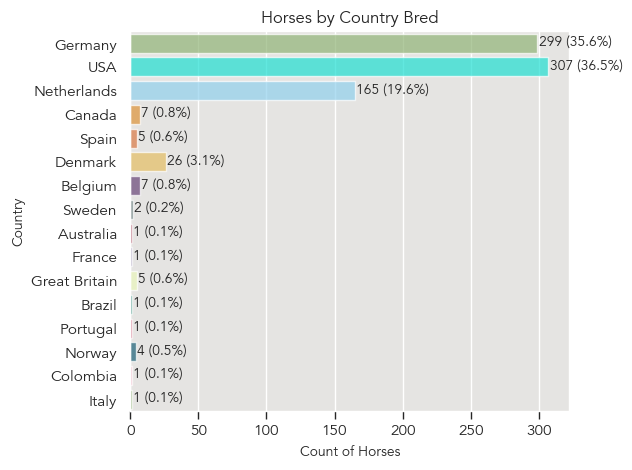

In [1341]:
# create a bar chart of horses by country bred
ax = sns.countplot(
   y = 'Country',
   data = horse_df,
   palette = color_palette,
   alpha= 0.7
)


# add annotation for count and percentage of horses bred in each country
for p in ax.patches:
    ax.annotate("{:0,.0f} ({:,.1f}%)".format(p.get_width(), p.get_width()*100/all_horses), (p.get_x() + p.get_width() + 1, p.get_y() + .4), ha = 'left', va = 'center')

# set title and xlabel
plt.title('Horses by Country Bred')
plt.xlabel('Count of Horses')

# save and show figure
plt.tight_layout()
plt.savefig('images/horses-by-country.png')
plt.show()

### Top Ten Sires of Championship Competitors

In [193]:
# get the top ten sires by count off offspring (showing 15 horses, as there are multiple horses tied for various placings)
top_sires = horse_df['Sire'].value_counts().head(15).reset_index()

# rename columns
top_sires.columns = ['Sire', 'Count of Horses']

# print to markdown 
#print(top_sires.to_markdown())


|    | Sire             |   Count of Horses |
|---:|:-----------------|------------------:|
|  1 | Sandro Hit       |                24 |
|  2 | Furstenball      |                18 |
|  3 | Sir Donnerhall I |                18 |
|  4 | Jazz             |                13 |
|  5 | Rotspon          |                12 |
|  6 | Fidertanz        |                12 |
|  7 | Florestan I      |                12 |
|  8 | Hotline          |                10 |
|  9 | Florencio I      |                 9 |
| 10 | Grand Galaxy Win |                 9 |
| 11 | Sir Sinclair     |                 9 |
| 12 | Apache           |                 8 |
| 13 | Rousseau         |                 8 |
| 14 | Diamond Hit      |                 8 |
| 15 | Belissimo M      |                 8 |

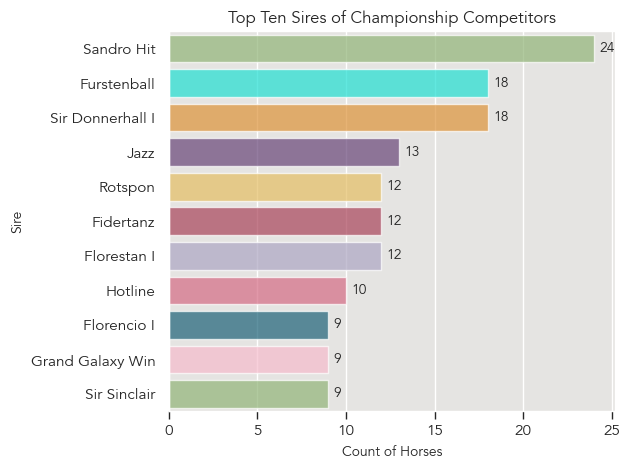

In [1343]:
# set countplot options
sire_chart = sns.countplot(
   y = 'Sire',
   data = horse_df,
   palette = color_palette_10,
   alpha = 0.7,
   order = horse_df['Sire'].value_counts().iloc[:11].index
)

# add count of offspring to bars
sire_chart.bar_label(sire_chart.containers[0], padding=4)

# set title and xlabel
plt.title('Top Ten Sires of Championship Competitors')
plt.xlabel('Count of Horses')

# save and show figure
plt.tight_layout()
plt.savefig('images/top-10-sires.png')
plt.show()

### Top Ten Sires of Grand Prix Horses

In [808]:
# get the top ten sires of Grand Prix horses by count off offspring

# select all Grand Prix horses
gp_sires = horse_df.loc[(horse_df['HighestLevel'] == 'Grand Prix')]

# select the top 15 sires, as there are multiple horses tied for various placings, and create column for offspring count
gp_sires = gp_sires['Sire'].value_counts().head(15).reset_index()

# rename columns
gp_sires.columns = ['Sire', 'Count of Horses']

# print to markdown
#print(gp_sires.to_markdown())

|    | Sire             |   Count of Horses |
|---:|:-----------------|------------------:|
|  1 | Sandro Hit       |                12 |
|  2 | Jazz             |                 8 |
|  3 | Sir Donnerhall I |                 7 |
|  4 | Florestan I      |                 5 |
|  5 | Florencio I      |                 5 |
|  6 | Fidertanz        |                 4 |
|  7 | Quaterback       |                 4 |
|  8 | Rotspon          |                 4 |
|  9 | Belissimo M      |                 4 |
| 10 | Furstenball      |                 3 |
| 11 | Sir Sinclair     |                 3 |
| 12 | San Amour        |                 3 |
| 13 | Hotline          |                 3 |
| 14 | Gribaldi         |                 3 |
| 15 | Contango         |                 3 |

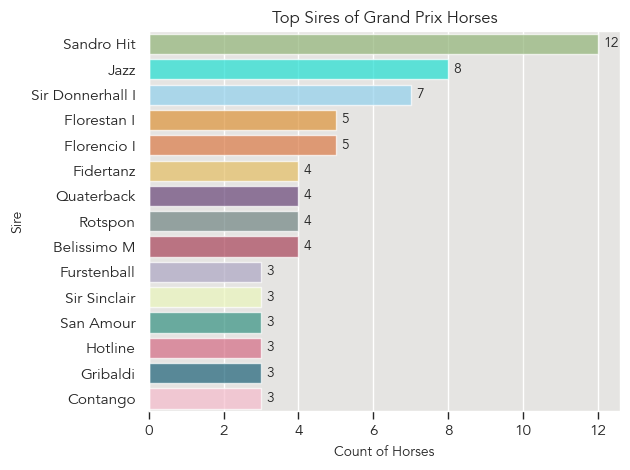

In [1073]:
# create countplot of top Grand Prix sires

# get all horses that competed at Grand Prix
gp_sire_group = horse_df.loc[(horse_df['HighestLevel'] == 'Grand Prix')]

# set up figure options
gp_sire_chart = sns.countplot(
   y = gp_sire_group['Sire'],
   data = gp_sire_group,
   palette = color_palette,
   alpha = 0.7,
   order = gp_sire_group['Sire'].value_counts().iloc[:15].index
)

# add count of offspring to bars
gp_sire_chart.bar_label(gp_sire_chart.containers[0], padding=4)

# set title and xlabel
plt.title('Top Sires of Grand Prix Horses')
plt.xlabel('Count of Horses')

# save and show figure
plt.tight_layout()
plt.savefig('images/top-gp-sires.png')
plt.show()

### Percentage of Grand Prix Offspring by Sire

In [897]:

# get value counts of offspring for top 50 sires and add column for count
sires = horse_df['Sire'].value_counts().iloc[:50].reset_index()

#rename columns
sires.columns = ['Sire', 'Offspring']

# get all horses competing at Grand Prix
gp_sire_group = horse_df.loc[(horse_df['HighestLevel'] == 'Grand Prix')]

# get value counts of offspring for top 30 sires and add column for count
gp_sire_group = gp_sire_group['Sire'].value_counts().iloc[:50].reset_index()

#rename columns
gp_sire_group.columns = ['Sire', 'GP Offspring']

# merge columns to create sire dataframe
sire_df = pd.merge(sires, gp_sire_group)

# empty list to hold percentage values
percentage = []

#loop through the sire dataframe, calculate percentage of GP offspring and append to percentage list
for i in sire_df.index:
        sire = sire_df['Sire'][i]
        gp_percentage = (sire_df['GP Offspring'][i]) / (sire_df['Offspring'][i]) * 100
        percentage.append(gp_percentage)
    

# create new column from list of percentages
sire_df['GP Percentage'] = percentage

# convert column datatype for formatting
sire_df['GP Percentage'] = pd.to_numeric(sire_df['GP Percentage'], errors='coerce')

# format percentages
#sire_df['GP Percentage'] = sire_df['GP Percentage'].map('{:.2f}%'.format)

# reduce the dataframe to sires with at least 5 offspring
sire_df = sire_df.loc[(sire_df['Offspring'] >= 5)]

#sire_df = sire_df.sort_values(by=['GP Percentage'], ascending=False)

#print(sire_df.to_markdown())       
                                

|    | Sire             |   Offspring |   GP Offspring | GP Percentage   |
|---:|:-----------------|------------:|---------------:|:----------------|
|  1 | Quaterback       |           6 |              4 | 66.67%          |
|  2 | Jazz             |          13 |              8 | 61.54%          |
|  3 | Florencio I      |           9 |              5 | 55.56%          |
|  4 | Sandro Hit       |          24 |             12 | 50.00%          |
|  5 | Belissimo M      |           8 |              4 | 50.00%          |
|  6 | San Amour        |           7 |              3 | 42.86%          |
|  7 | Contango         |           7 |              3 | 42.86%          |
|  8 | Florestan I      |          12 |              5 | 41.67%          |
|  9 | Rosenthal        |           5 |              2 | 40.00%          |
| 10 | Johnson          |           5 |              2 | 40.00%          |
| 11 | Sir Donnerhall I |          18 |              7 | 38.89%          |
| 12 | Sir Sinclair     |           9 |              3 | 33.33%          |
| 13 | Vivaldi          |           6 |              2 | 33.33%          |
| 14 | Fidertanz        |          12 |              4 | 33.33%          |
| 15 | Rotspon          |          12 |              4 | 33.33%          |
| 16 | Romanov          |           6 |              2 | 33.33%          |
| 17 | Hotline          |          10 |              3 | 30.00%          |
| 18 | UB 40            |           7 |              2 | 28.57%          |
| 19 | Diamond Hit      |           8 |              2 | 25.00%          |
| 20 | Rousseau         |           8 |              2 | 25.00%          |
| 21 | Charmeur         |           5 |              1 | 20.00%          |
| 22 | Furstenball      |          18 |              3 | 16.67%          |

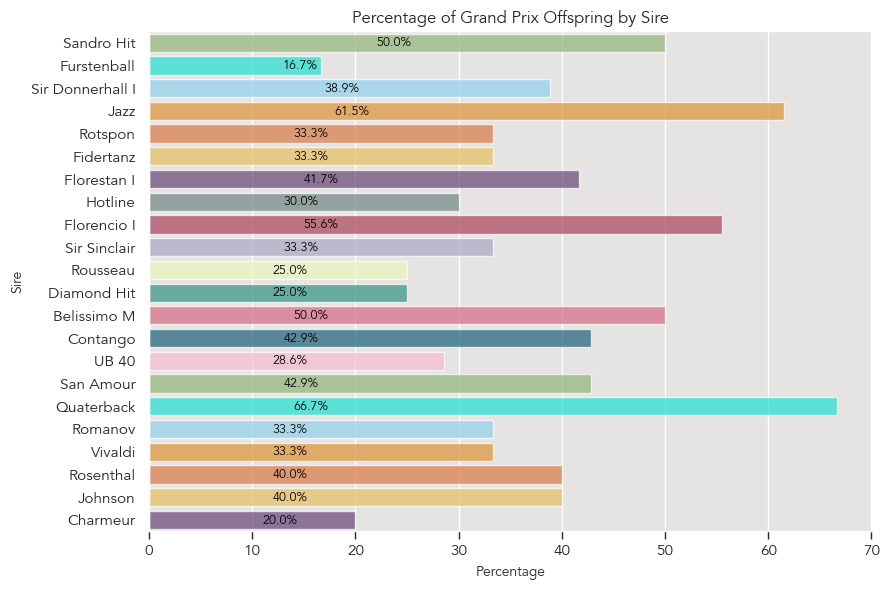

In [1344]:
ax = plt.subplots(figsize=(9, 6))

ax = sns.barplot(y='Sire', x='GP Percentage', data=sire_df, palette=color_palette, alpha=.7)

offspring_count = top_sires['Count of Horses'].value_counts()

percentage = sire_df['GP Percentage']


for index, row in sire_df.iterrows():
   plt.text(row['GP Offspring'] + 10, index, f"{row['GP Percentage']:.1f}%", 
          color='black', fontsize=9, ha="left", va='center')
    

# set title, xlabel, and ylabel
ax.set_title('Percentage of Grand Prix Offspring by Sire')
ax.set_ylabel('Sire')
ax.set_xlabel('Percentage')

# rotate xticks
#plt.xticks(rotation=90)

# save and show figure
plt.tight_layout()
plt.savefig('images/gp-sire-percentage.png')
plt.show()


### Top Ten Damsires of Championship Competitors

In [192]:
# get the top ten damsires represented over all years (2002 - 2023) and add column for count
top_damsires = horse_df['Damsire'].value_counts().head(10).reset_index()
#rename columns
top_damsires.columns = ['Damsire', 'Count of Horses']

#print(top_damsires.to_markdown())

|    | Damsire          |  Count of Horses |
|---:|:-----------------|-----------------:|
|  1 | Rubinstein       |               25 |
|  2 | De Niro          |               18 |
|  3 | Sandro Hit       |               17 |
|  4 | Jazz             |               16 |
|  5 | Rotspon          |               16 |
|  6 | Weltmeyer        |               14 |
|  7 | Ferro            |               13 |
|  8 | Krack C          |               11 |
|  9 | Sir Donnerhall I |               11 |
| 10 | Rohdiamant       |               11 |

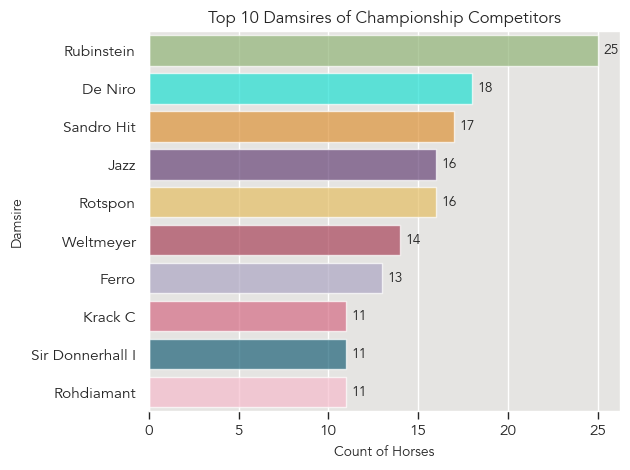

In [1074]:
# create bar chart of top 10 damsires

# set options for countplot
damsire_chart = sns.countplot(
   y = 'Damsire',
   data = horse_df,
   palette = color_palette_10,
   alpha = 0.7,
   order = horse_df['Damsire'].value_counts().iloc[:10].index
)

# add count of offspring to bars
damsire_chart.bar_label(damsire_chart.containers[0], padding=4)

# set title, xlable, and ylabel
plt.title('Top 10 Damsires of Championship Competitors')
plt.xlabel('Count of Horses')
plt.ylabel('Damsire')

# save and show figure
plt.tight_layout()
plt.savefig('images/top-10-damsires.png')
plt.show()

### Top Ten Damsires of Grand Prix Horses

In [799]:
# get the top ten damsires of Grand Prix horses by count of offspring

# get all Grand Prix horses
gp_damsires = horse_df.loc[(horse_df['HighestLevel'] == 'Grand Prix')]

# get the top ten damsires 
gp_damsires = gp_damsires['Damsire'].value_counts().head(10).reset_index()

# rename columns for markdown table
gp_damsires.columns = ['Damsire', 'Count of Horses']

# print to markdown
#print(gp_damsires.to_markdown())

|    | Damsire        |   Count of Horses |
|---:|:---------------|------------------:|
|  1 | De Niro        |                 7 |
|  2 | Rubinstein     |                 6 |
|  3 | Rotspon        |                 6 |
|  4 | Brentano II    |                 5 |
|  5 | Ferro          |                 5 |
|  6 | Weltmeyer      |                 4 |
|  7 | Rohdiamant     |                 4 |
|  8 | Jazz           |                 4 |
|  9 | Flemmingh      |                 3 |
| 10 | Wolkenstein II |                 3 |

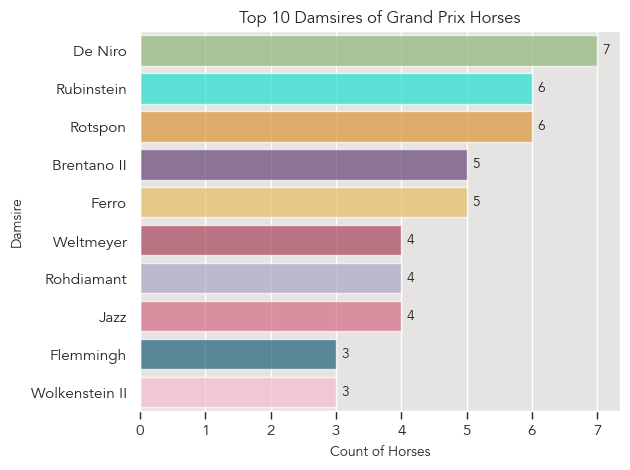

In [1084]:
# create bar chart of top ten damsires of Grand Prix horses

# get all horses that have competed to Grand Prix
gp_damsire_group = horse_df.loc[(horse_df['HighestLevel'] == 'Grand Prix')]

# set options for the countplot
gp_damsire_chart = sns.countplot(
   y = gp_damsire_group['Damsire'],
   data = gp_damsire_group,
   palette = color_palette_10,
   alpha = .7,
   order = gp_damsire_group['Damsire'].value_counts().iloc[:10].index
)

# add labels for bars
gp_damsire_chart.bar_label(gp_damsire_chart.containers[0], padding=4)

# set title and xlabel
plt.title('Top 10 Damsires of Grand Prix Horses')
plt.xlabel('Count of Horses')

# save and show figure
plt.tight_layout()
plt.savefig('images/top-gp-damsires.png')
plt.show()

### Percentage of Grand Prix Offspring by Damsire

In [937]:
# get value counts of offspring for top 20 damsires and add column for count
damsires = horse_df['Damsire'].value_counts().iloc[:20].reset_index()

#rename columns
damsires.columns = ['Damsire', 'Offspring']

# get all horses competing at Grand Prix
gp_damsire_group = horse_df.loc[(horse_df['HighestLevel'] == 'Grand Prix')]

# get value counts of offspring for top 20 sires and add column for count
gp_damsire_group = gp_damsire_group['Damsire'].value_counts().iloc[:20].reset_index()

#rename columns
gp_damsire_group.columns = ['Damsire', 'GP Offspring']

# merge columns to create damsire dataframe
damsire_df = pd.merge(damsires, gp_damsire_group)

# empty list to hold percentage values
percentage = []

#loop through the damsire dataframe, calculate percentage of GP offspring and append to percentage list
for i in damsire_df.index:
        damsire = damsire_df['Damsire'][i]
        gp_percentage = (damsire_df['GP Offspring'][i]) / (damsire_df['Offspring'][i]) * 100
        percentage.append(gp_percentage)
    

# create new column from list of percentages
damsire_df['GP Percentage'] = percentage

# convert column datatype for formatting
damsire_df['GP Percentage'] = pd.to_numeric(damsire_df['GP Percentage'], errors='coerce')

# format percentages
#damsire_df['GP Percentage'] = damsire_df['GP Percentage'].map('{:.2f}%'.format)

# reduce the dataframe to damsires with at least 5 offspring
damsire_df = damsire_df.loc[(damsire_df['Offspring'] >= 5)]



#print(damsire_df.to_markdown())

|    | Damsire        |   Offspring |   GP Offspring | GP Percentage   |
|---:|:---------------|------------:|---------------:|:----------------|
|  1 | Brentano II    |           5 |              5 | 100.00%         |
|  2 | Davignon I     |           6 |              3 | 50.00%          |
|  3 | Don Schufro    |           6 |              3 | 50.00%          |
|  4 | Wolkenstein II |           7 |              3 | 42.86%          |
|  5 | De Niro        |          18 |              7 | 38.89%          |
|  6 | Ferro          |          13 |              5 | 38.46%          |
|  7 | Rotspon        |          16 |              6 | 37.50%          |
|  8 | Flemmingh      |           8 |              3 | 37.50%          |
|  9 | Rohdiamant     |          11 |              4 | 36.36%          |
| 10 | Donnerhall     |          10 |              3 | 30.00%          |
| 11 | Weltmeyer      |          14 |              4 | 28.57%          |
| 12 | Jazz           |          16 |              4 | 25.00%          |
| 13 | Rubinstein     |          25 |              6 | 24.00%          |
| 14 | Romanov        |           9 |              2 | 22.22%          |
| 15 | Sandro Hit     |          17 |              3 | 17.65%          |

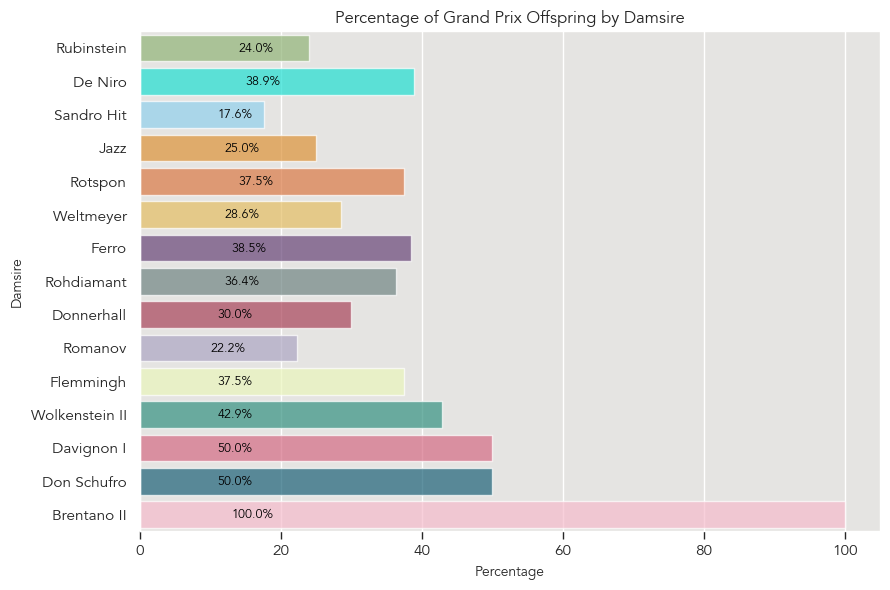

In [1345]:
ax = plt.subplots(figsize=(9, 6))

ax = sns.barplot(y='Damsire', x='GP Percentage', data=damsire_df, palette=color_palette, alpha=.7)

percentage = damsire_df['GP Percentage']

for index, row in damsire_df.iterrows():
   plt.text(row['GP Offspring'] + 8, index, f"{row['GP Percentage']:.1f}%", 
          color='black', fontsize=9, ha="left", va='center')
   

# set title, xlabel, and ylabel
ax.set_title('Percentage of Grand Prix Offspring by Damsire')
ax.set_ylabel('Damsire')
ax.set_xlabel('Percentage')

# save and show figure
plt.tight_layout()
plt.savefig('images/gp-damsire-percentage.png')
plt.show()

### Top Ten Most Prominent Breeders at Championships

In [797]:
# get the top ten most prominent breeders by count of horses
top_breeders = horse_df['Breeder'].value_counts().head(10).reset_index()

# rename columns 
top_breeders.columns = ['Breeder', 'Count of Horses']

#print(top_breeders.to_markdown())

|    | Breeder            |   Count of Horses |
|---:|:-------------------|------------------:|
|  1 | DG Bar Ranch       |                16 |
|  2 | Maryanna Haymon    |                12 |
|  3 | Nancy Holowesko    |                 9 |
|  4 | Leatherdale Farms  |                 7 |
|  5 | Gestut Lewitz      |                 6 |
|  6 | Oak Hill Ranch     |                 6 |
|  7 | Judy Yancey        |                 6 |
|  8 | Horses Unlimited   |                 6 |
|  9 | Jackie Ahl-Eckhaus |                 5 |
| 10 | Maurine Swanson    |                 5 |

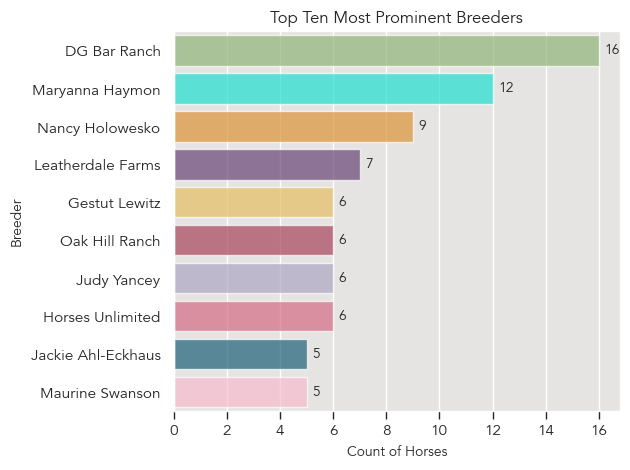

In [1076]:
# create bar chart of top ten most prominent breeders

# set options for the countplot
breeder_chart = sns.countplot(
   y = 'Breeder',
   data = horse_df,
   palette = color_palette_10,
   alpha = 0.7,
   order = horse_df['Breeder'].value_counts().iloc[:10].index
)

# add labels for bars
breeder_chart.bar_label(breeder_chart.containers[0], padding=4)

# set title and xlabel
plt.title('Top Ten Most Prominent Breeders')
plt.xlabel('Count of Horses')

# show and save figure
plt.tight_layout()
plt.savefig('images/top-10-breeders.png')
plt.show()

### Distribution of Competitors by Studbook

In [785]:
# get the top ten studbooks represented over all years 
top_studbooks = horse_df['Studbook'].value_counts().head(10).reset_index()

# create columns for name and count 
top_studbooks.columns = ['Studbook', 'Count']

# print to markdown
#print(top_studbooks.to_markdown())


|     |Studbook            |   Count |
|:---:|:-------------------|--------:|
|  1  | KWPN               |     243 |
|  2  | Hanoverian         |     241 |
|  3  | Oldenburg          |     184 |
|  4  | Westfalen          |      47 |
|  5  | Danish Warmblood   |      34 |
|  6  | Rhinelander        |      18 |
|  7  | American Warmblood |      10 |
|  8  | PRE                |       7 |
|  9  | Holsteiner         |       7 |
|  10 | Swedish Warmblood  |       6 |

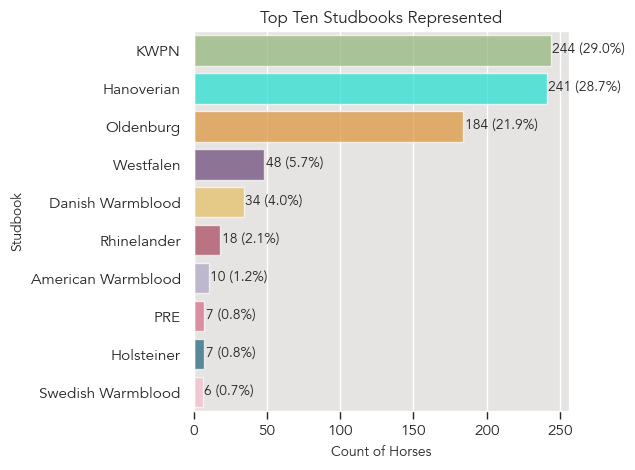

In [1342]:
# create a bar chart of the top ten studbooks represented 

# set options for the countplot
ax = sns.countplot(
   y = 'Studbook',
   data = horse_df,
   palette = color_palette_10,
   alpha = 0.7,
   order = horse_df['Studbook'].value_counts().iloc[:10].index
)


# add annotation for count and percentage of horses from each studbook
for p in ax.patches:
    ax.annotate("{:0,.0f} ({:,.1f}%)".format(p.get_width(), p.get_width()*100/all_horses), (p.get_x() + p.get_width() + 1, p.get_y() + .4), ha = 'left', va = 'center')


# set title and xlabel
plt.title('Top Ten Studbooks Represented')
plt.xlabel('Count of Horses')

# show and save figure
plt.tight_layout()
plt.savefig('images/top-10-studbooks.png')
plt.show()

### Most Championship Appearances Over All Years

In [793]:
# get the top horses with the most championship appearances over all years 

# selecting 12 horses vs 10 due to so many having 5 trips
most_appearances = championship_df['Horse'].value_counts().head(12).reset_index()

# rename columns for markdown table
most_appearances.columns = ['Horse', 'Trips to Championships']

#print(most_appearances.to_markdown())

|    | Horse                |   Trips to Championships |
|---:|:---------------------|-------------------------:|
|  1 | WakeUp               |                        6 |
|  2 | Don Cesar            |                        5 |
|  3 | Pikko del Cerro HU   |                        5 |
|  4 | Quantum Jazz         |                        5 |
|  5 | Fashion Designer OLD |                        5 |
|  6 | Sternlicht Hilltop   |                        5 |
|  7 | Sole Mio             |                        5 |
|  8 | Ronin                |                        5 |
|  9 | Floretienne          |                        5 |
| 10 | Flavius MF           |                        5 |
| 11 | Spirit of Joy        |                        5 |
| 12 | Au Revoir            |                        5 |

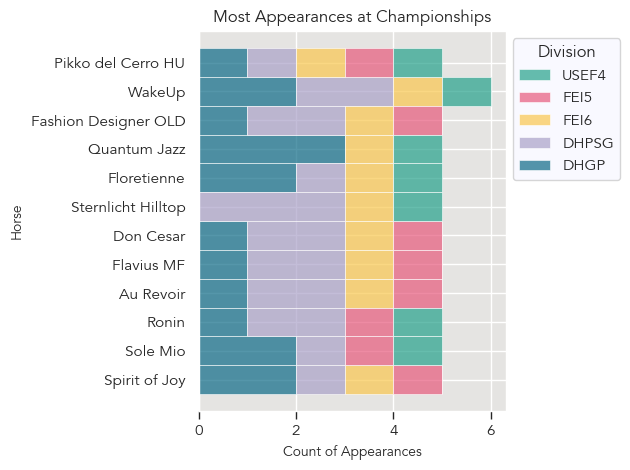

In [1046]:
# create a stacked bar chart of the horses with the most championship appearances

# create a copy of the championship dataframe
most_prolific = championship_df

# get count of appearances by horse
competitor_counts = championship_df['Horse'].value_counts().reset_index()

# rename columns
competitor_counts.columns = ['Horse', 'Appearance Count']

# merge the dataframes
most_appearances_scores= pd.merge(most_prolific, competitor_counts)

# get the horses that have been to championships 5 or more times
most_appearances_scores = most_appearances_scores.loc[(most_appearances_scores['Appearance Count'] >= 5)]

# set options for the stacked bar chart
ax = sns.histplot(
    data= most_appearances_scores,
    y = 'Horse',
    hue = 'Division',
    multiple = 'stack',
    palette = {'FEI5': '#e75a7c', 'FEI6': '#f9c74f', 'USEF4': '#25a18b', 'DHPSG': '#aaa1c8', 'DHGP': '#0d6a87', 'FEI7': '#fff0f5'},
    linewidth = 0.4,
    alpha = 0.7
)

# move the legend outside the figure for a less cluttered look
sns.move_legend(ax, 'upper left', bbox_to_anchor=(1, 1))

# set title and xlabel
plt.title('Most Appearances at Championships')
plt.xlabel('Count of Appearances')

# save and show figure
plt.tight_layout()
plt.savefig('images/most-appearances.png')
plt.show()